# Задача 1

### Правый уголок
$$
u^{n+1}_m = - \frac{a\tau}{h} * (u^n_{m+1} - u^n_m) + u^n_m 
$$

### Схема Лакса

$$
u^{n+1}_m = -\frac{a\tau}{h}(u^n_{m+1} - u^n_{m-1}) + 0.5 (u^n_{m-1} + u^n_{m+1})
$$

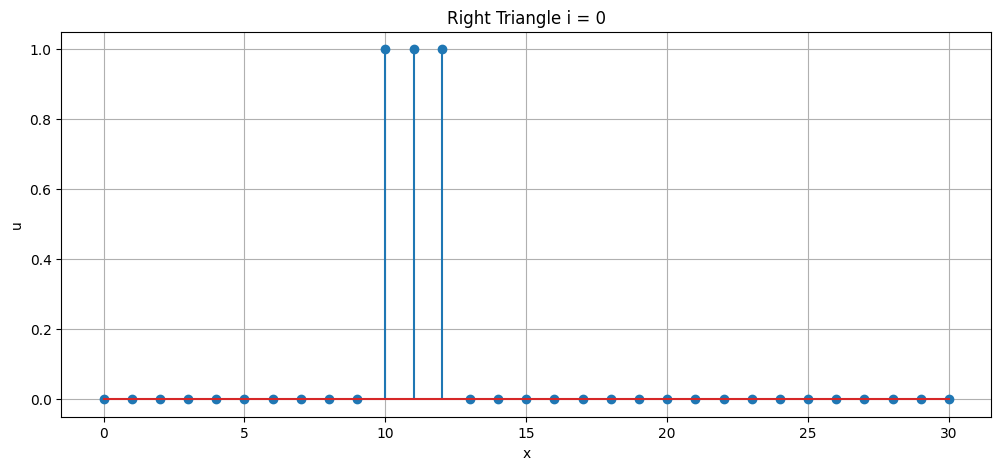

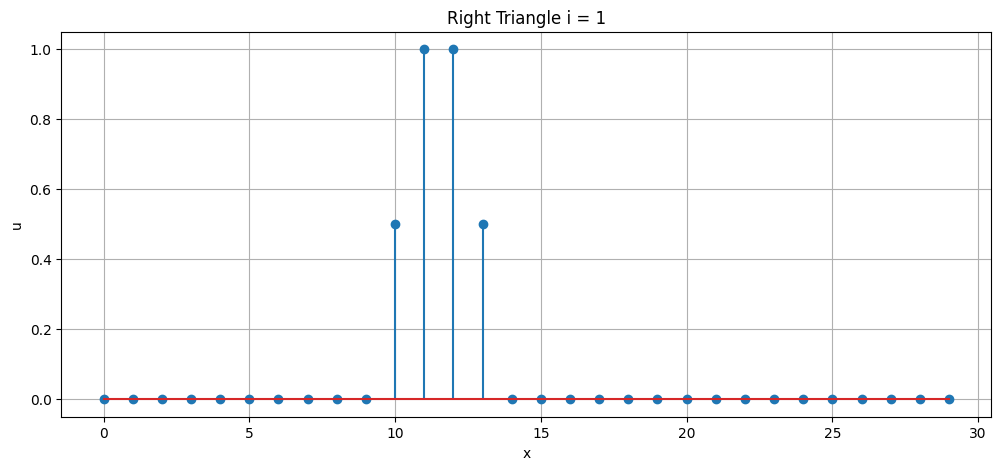

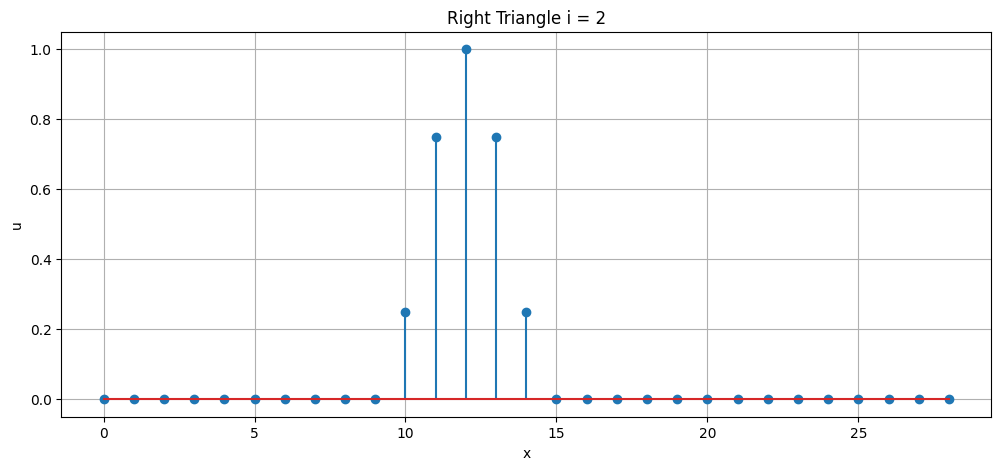

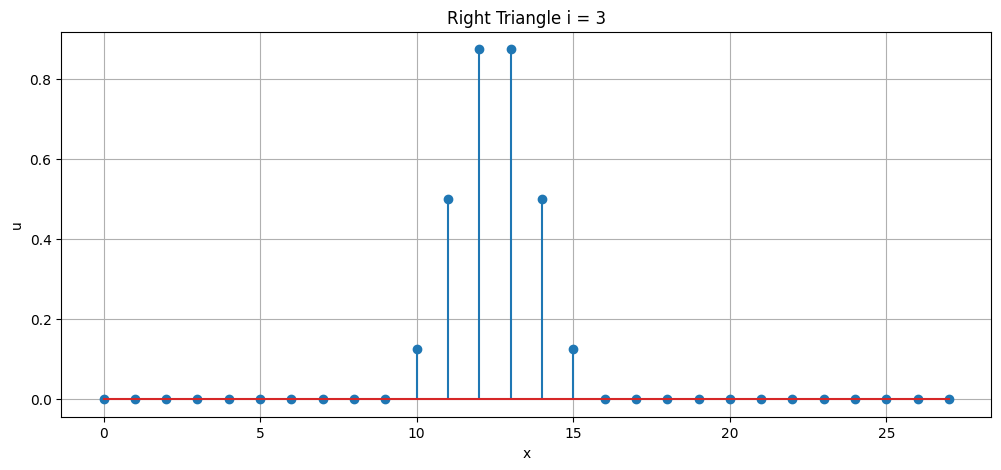

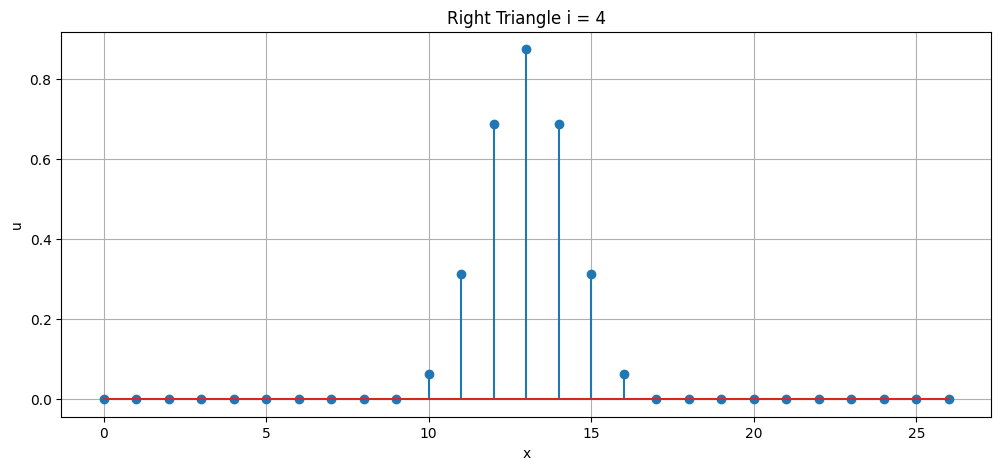

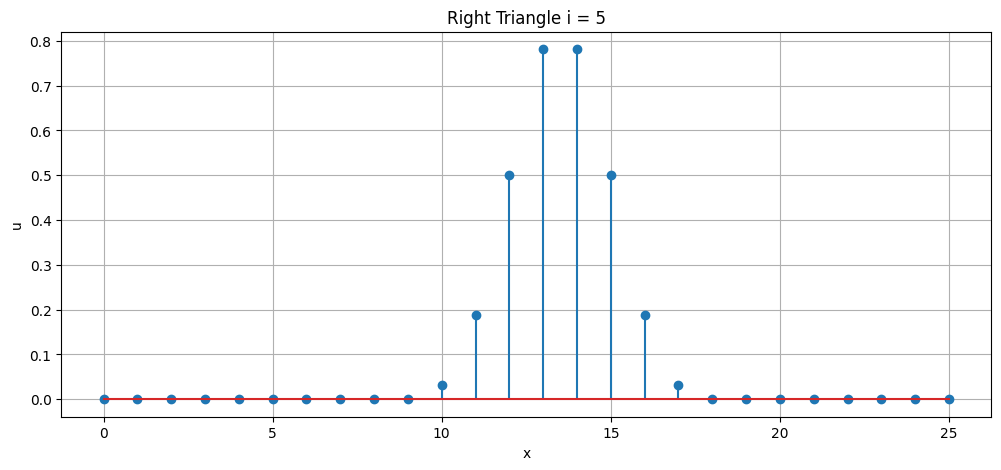

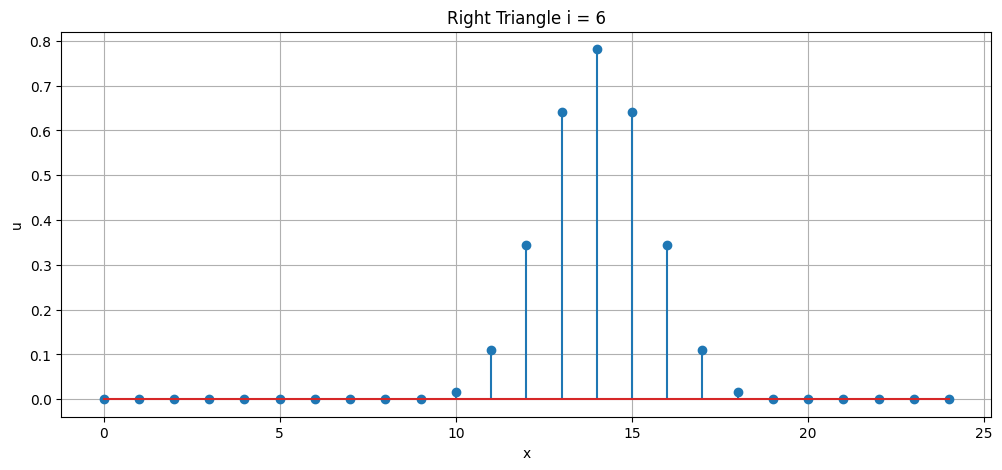

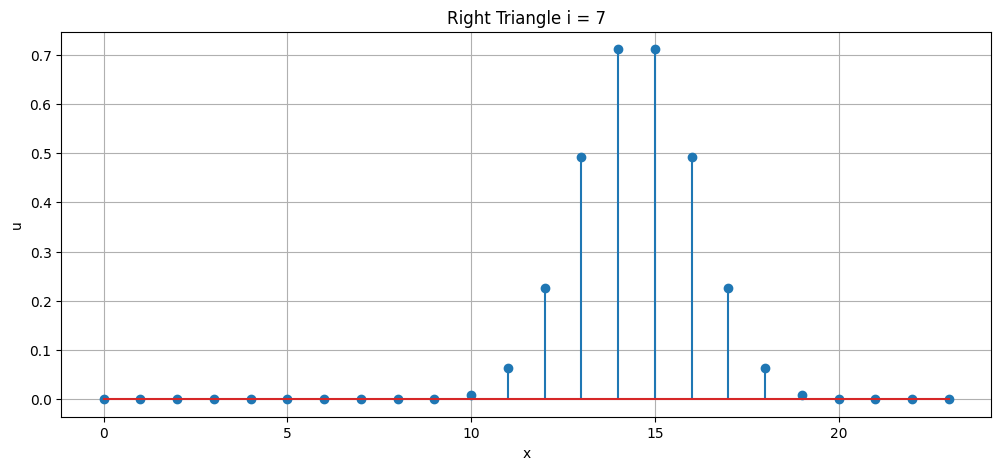

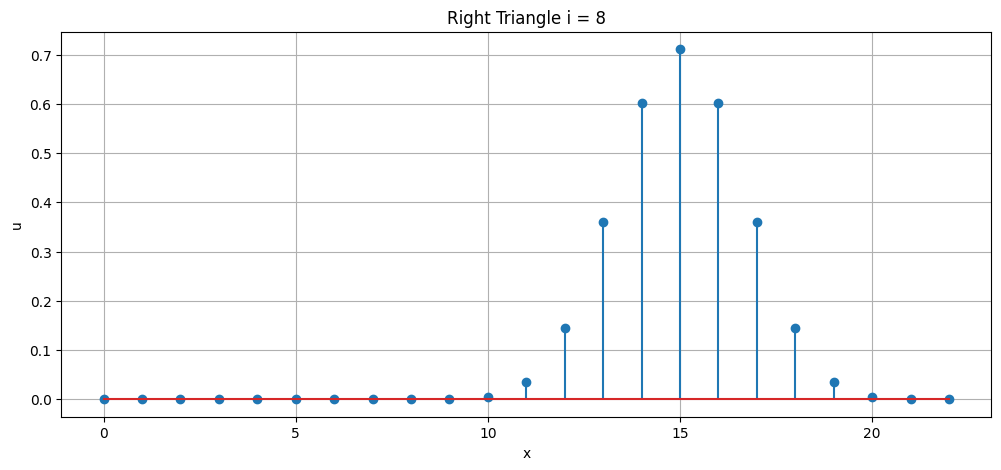

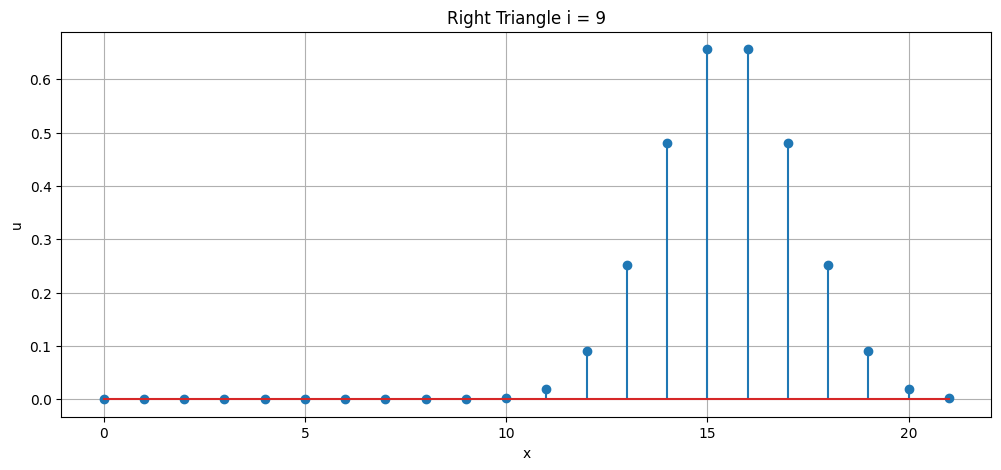

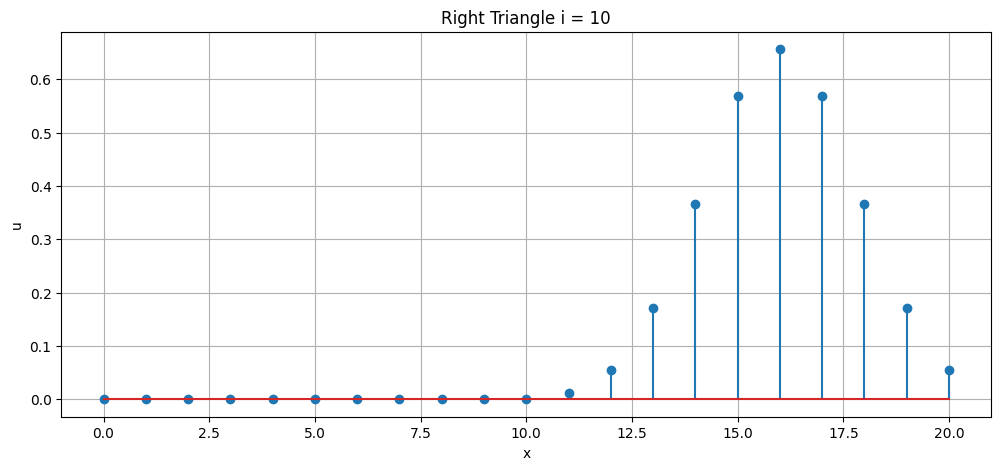

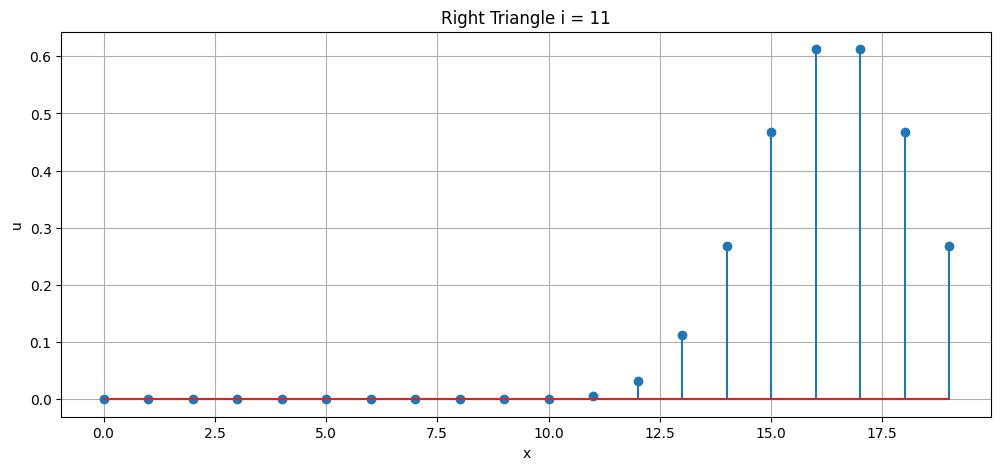

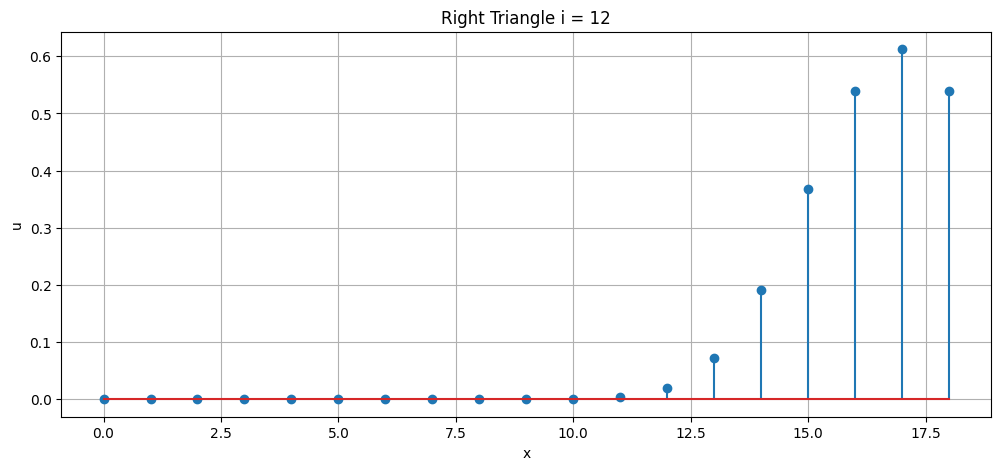

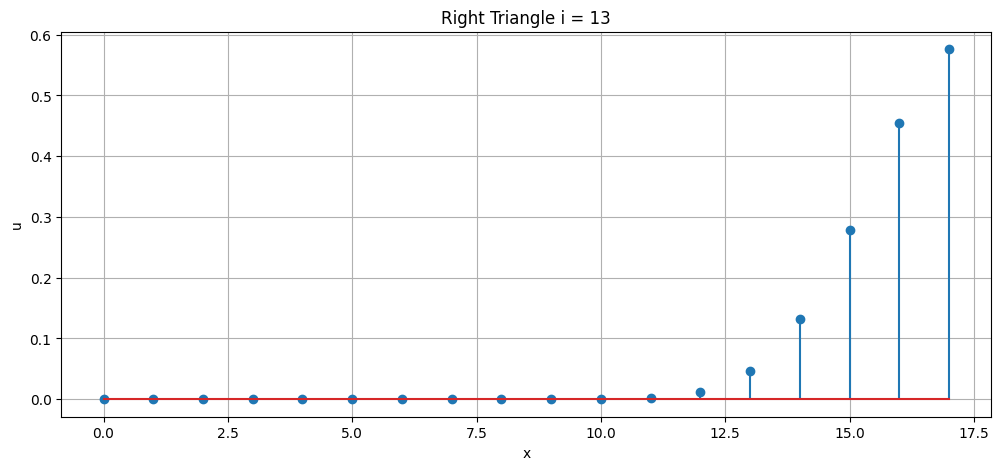

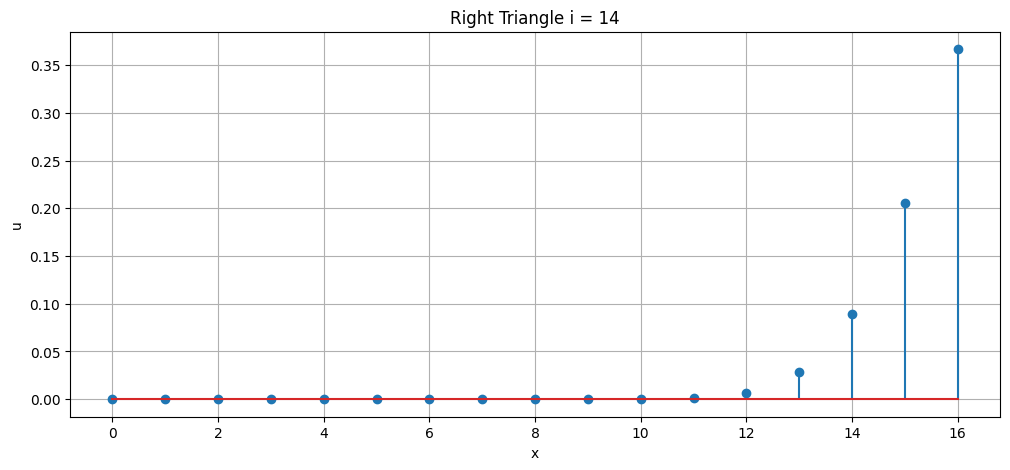

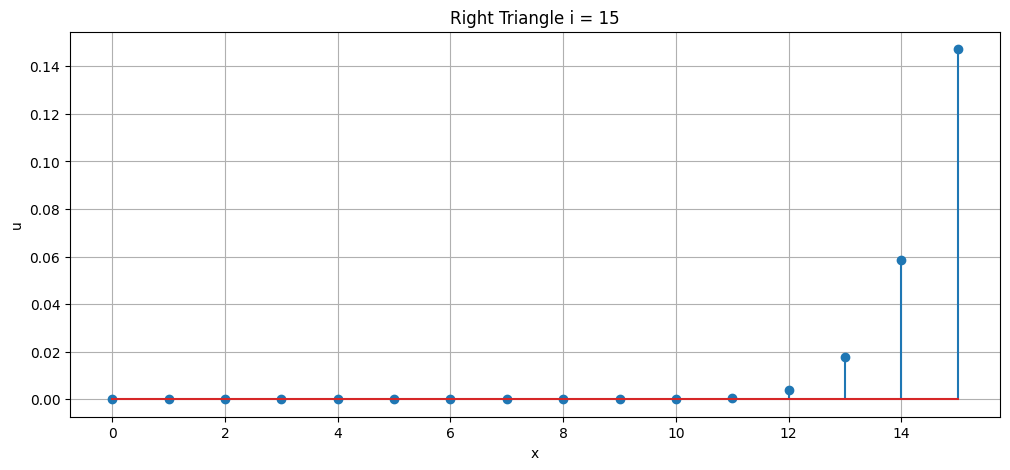

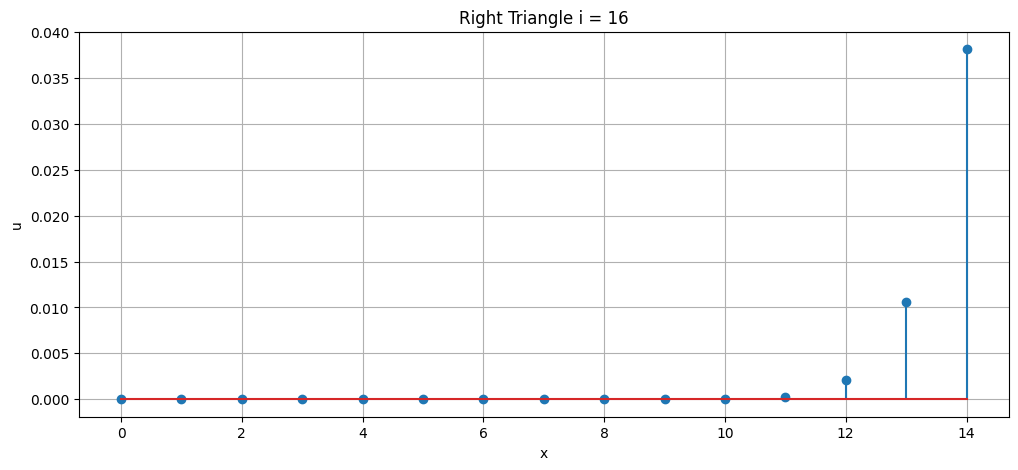

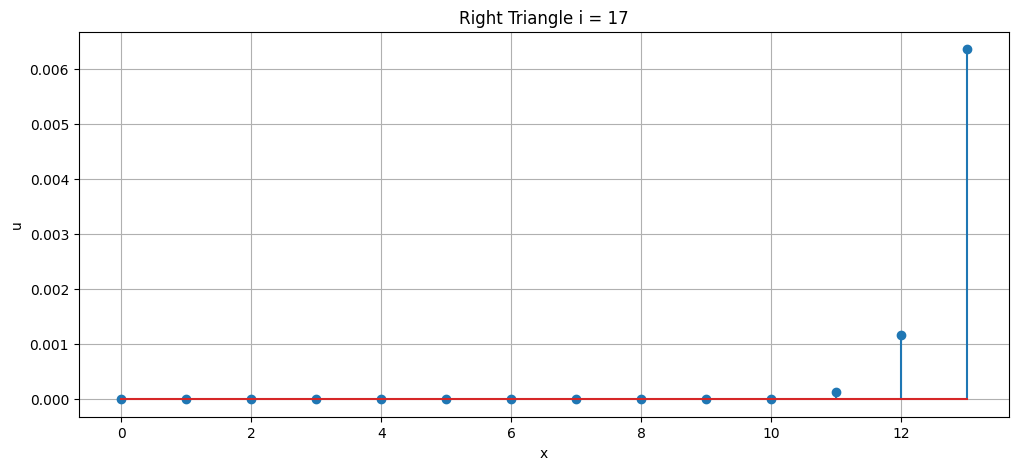

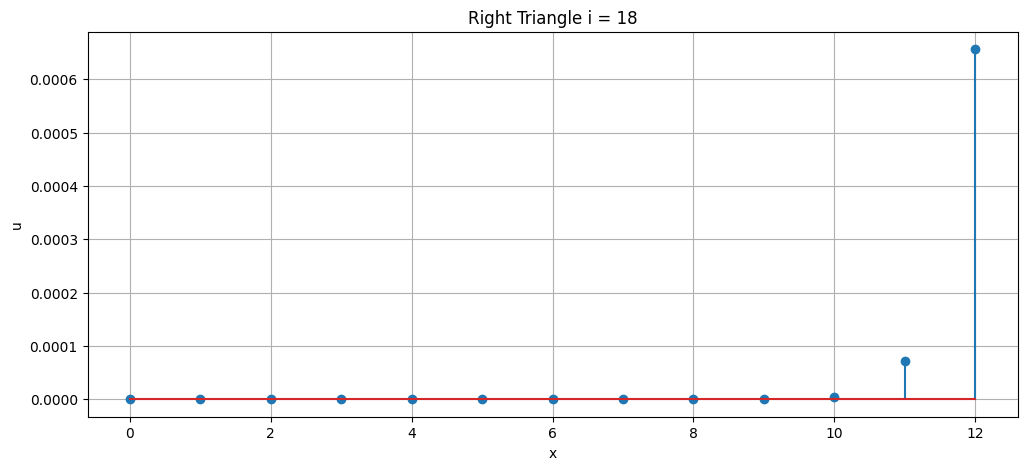

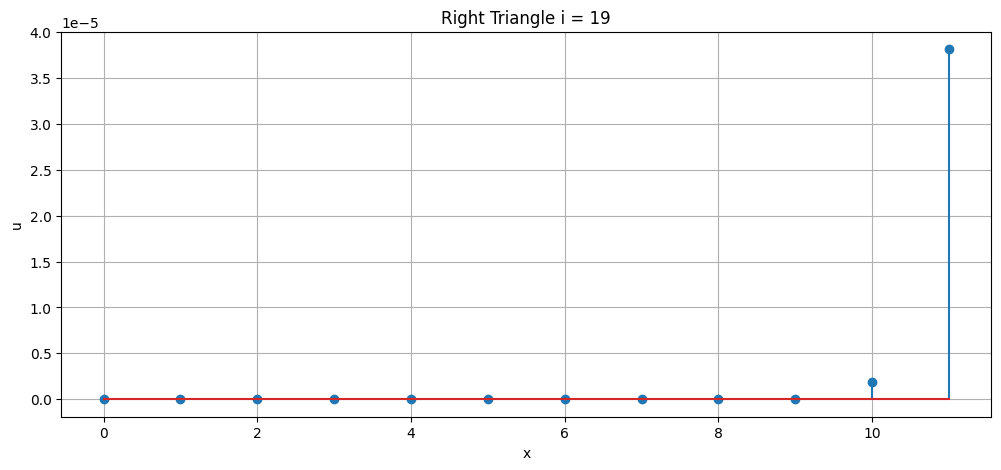

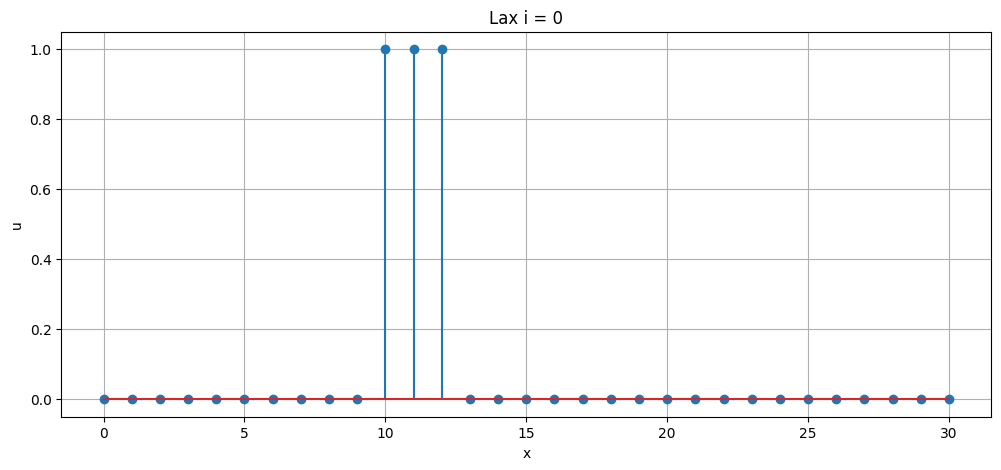

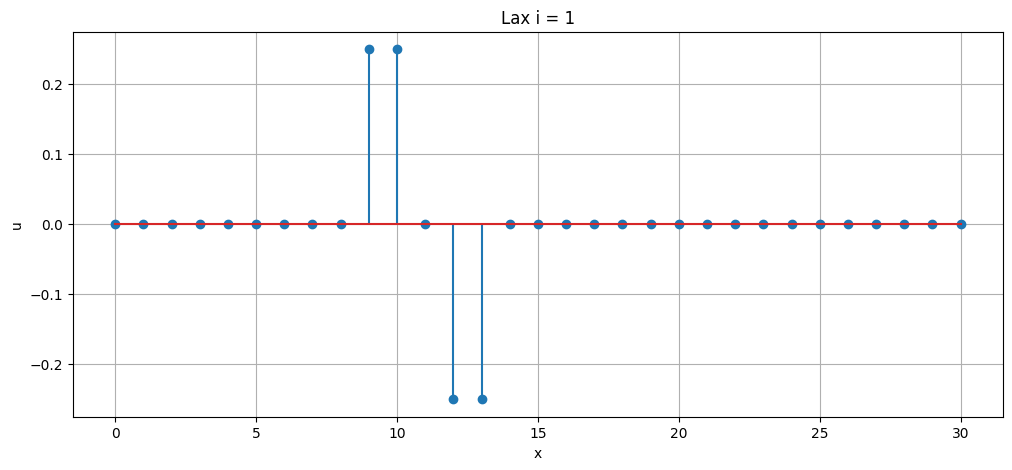

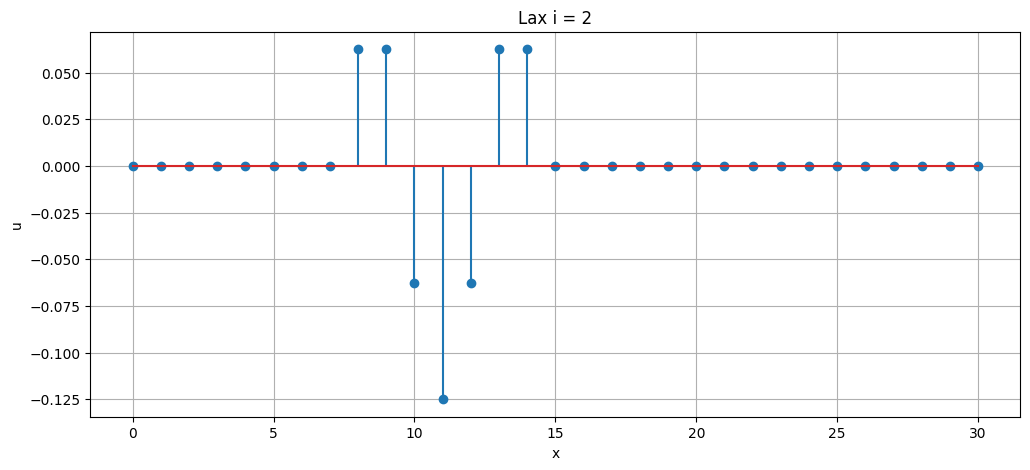

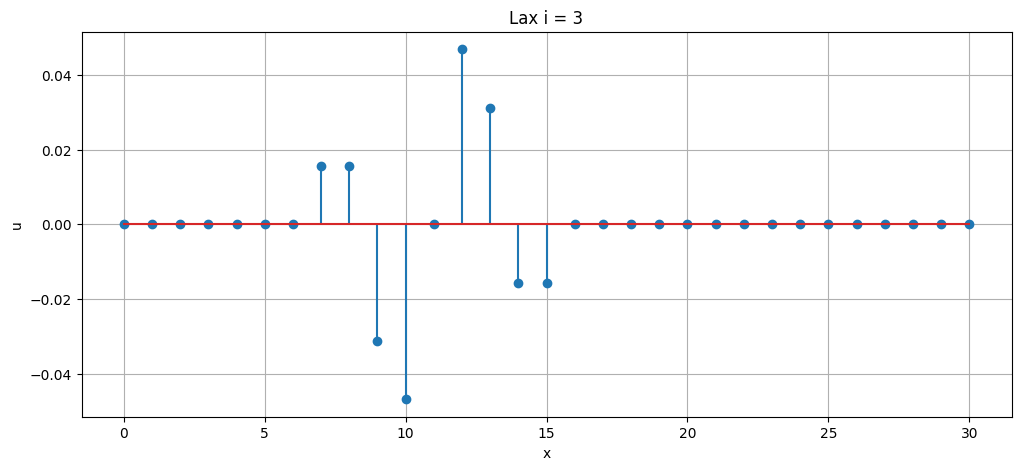

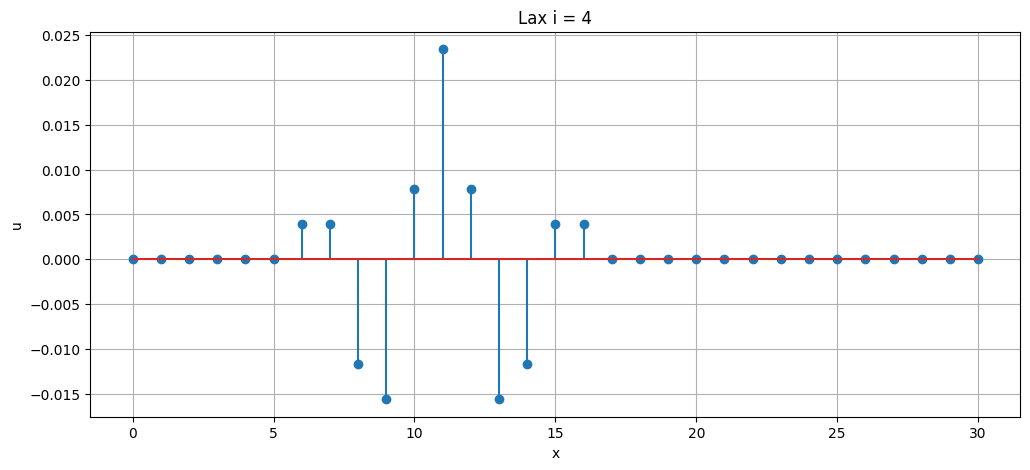

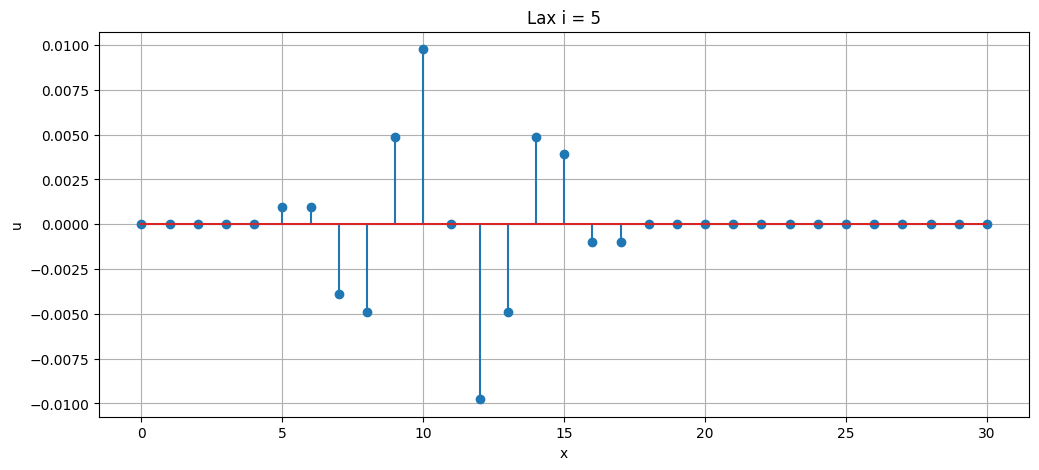

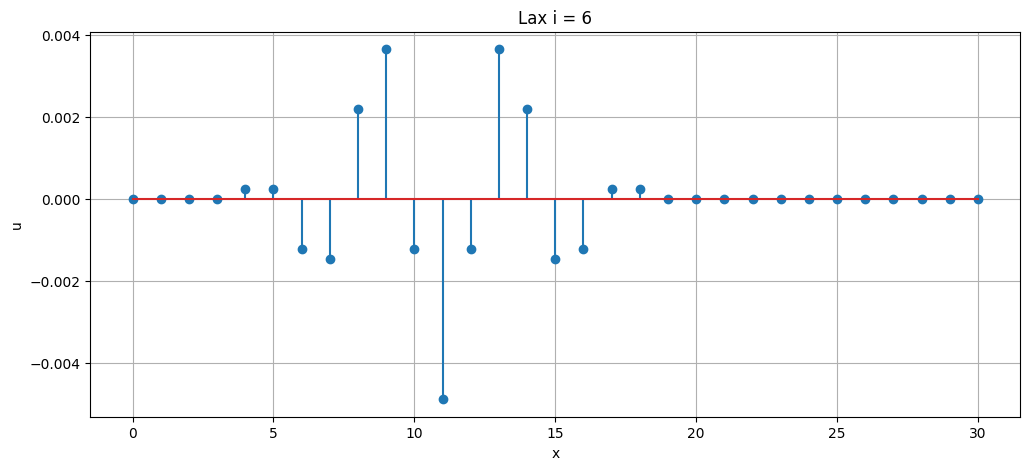

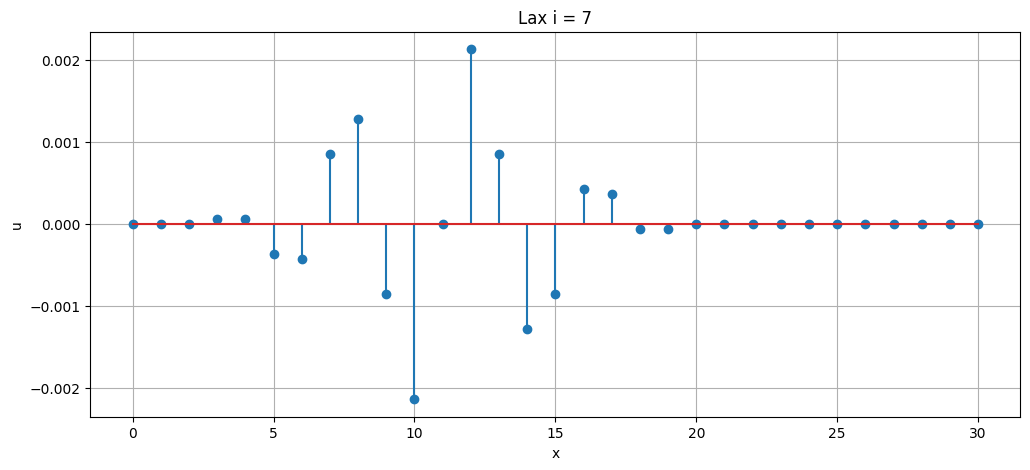

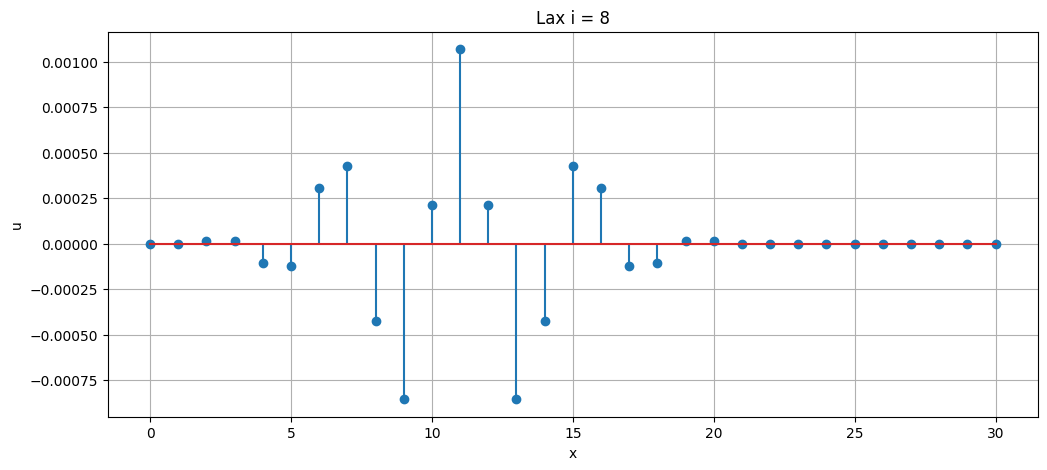

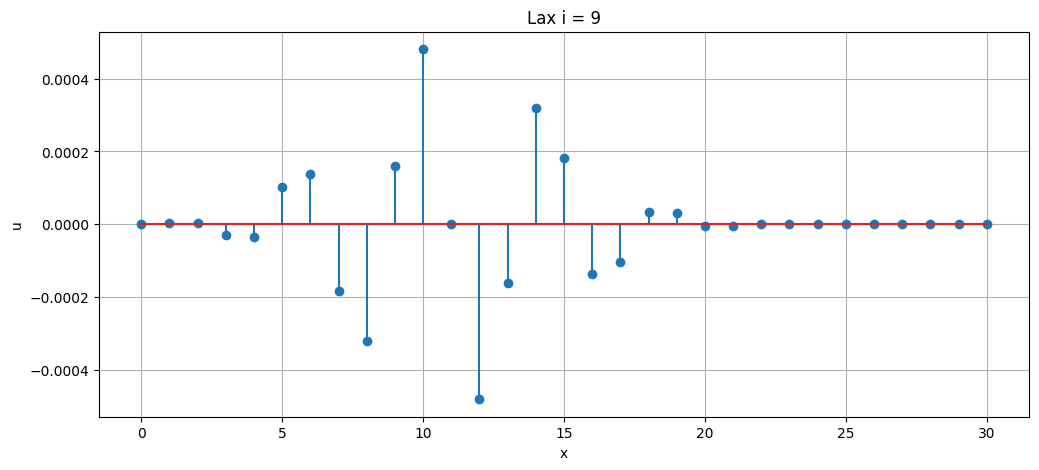

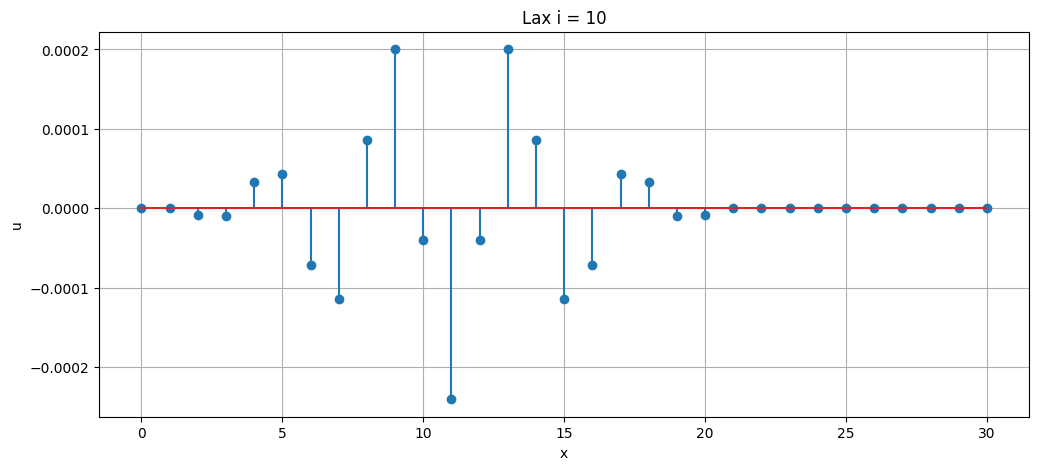

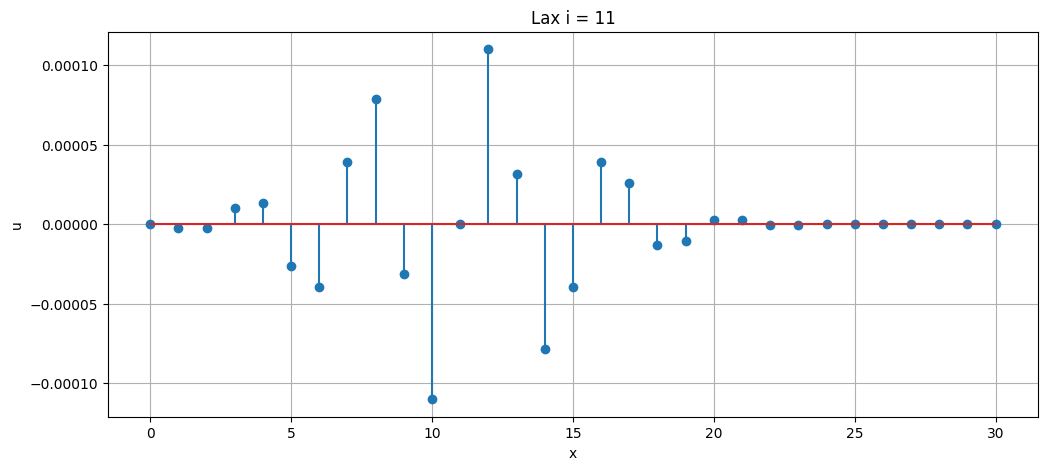

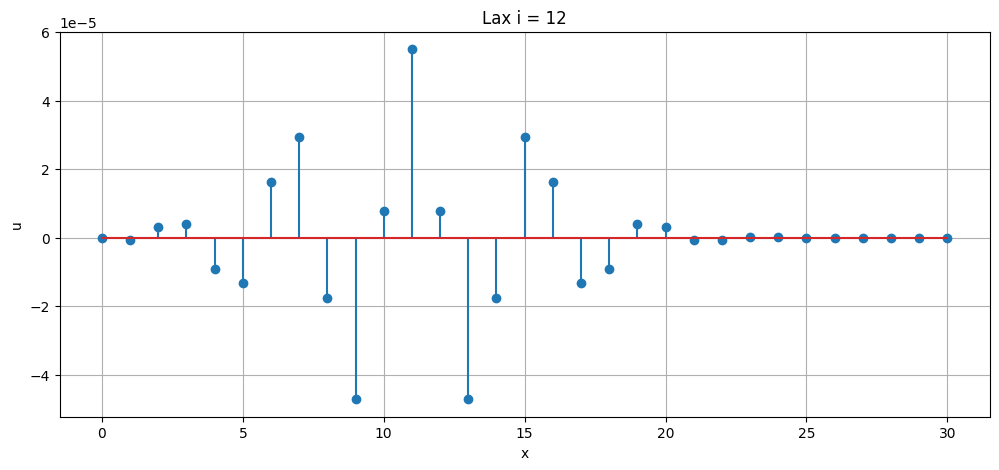

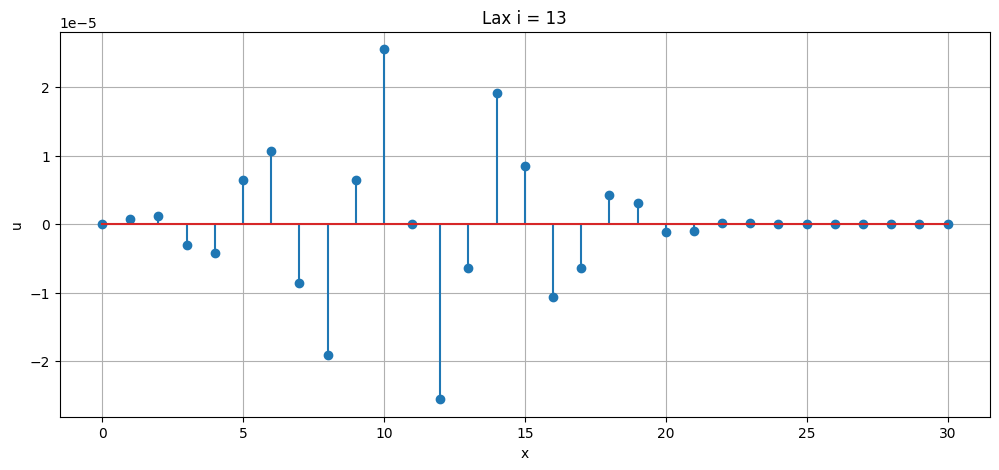

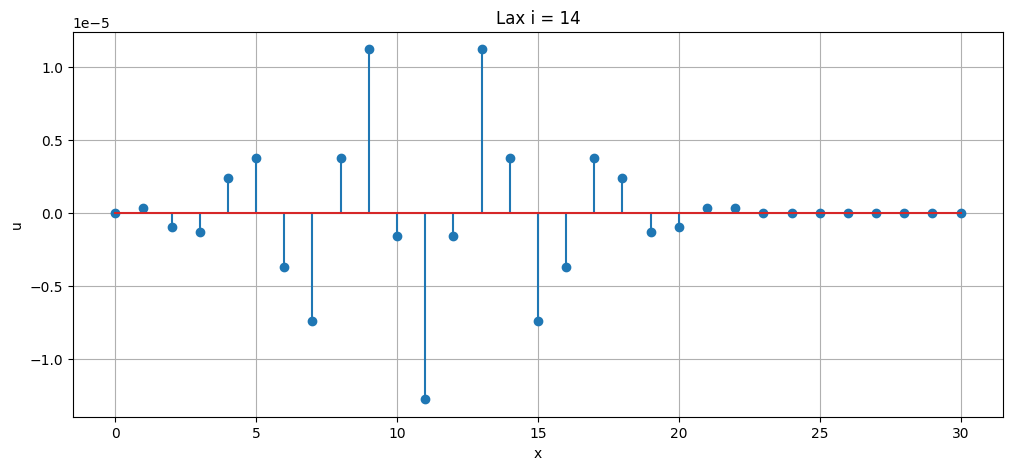

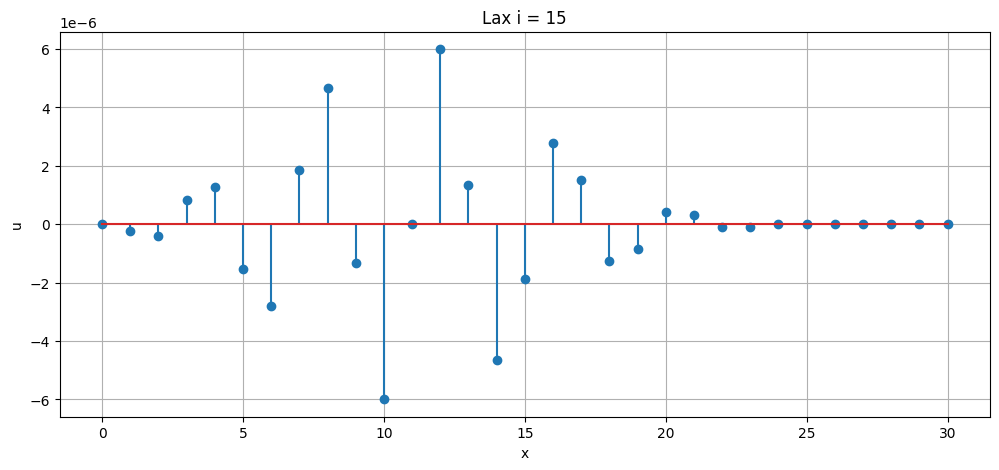

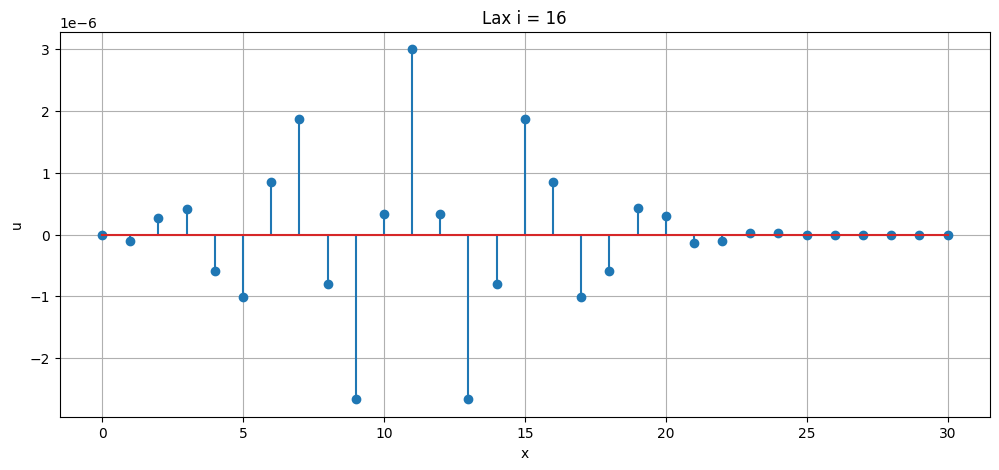

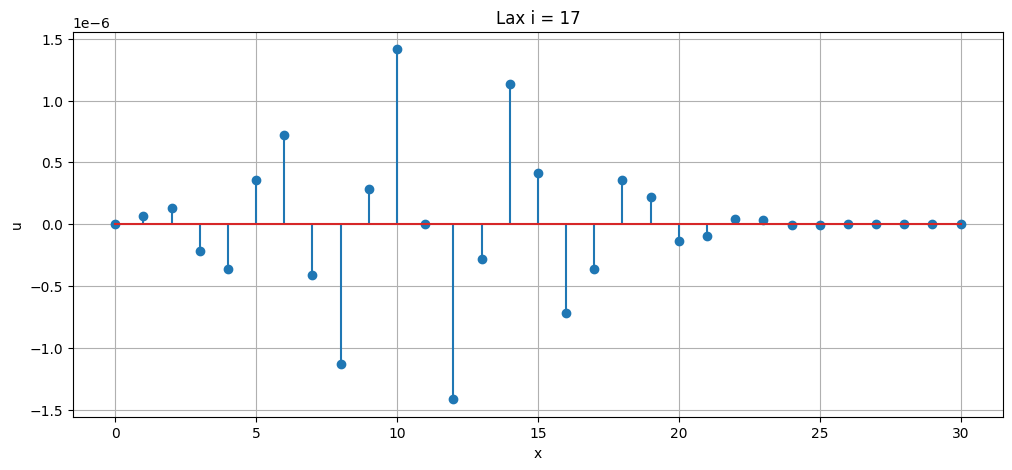

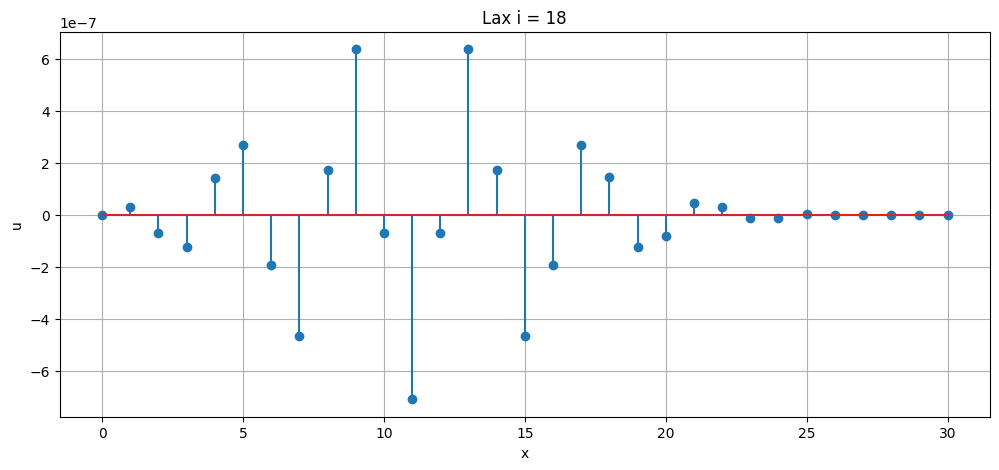

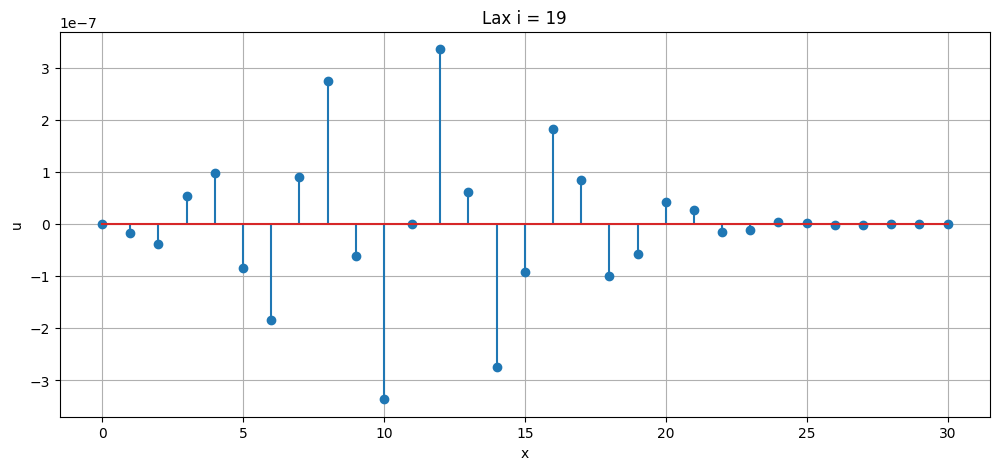

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

h = 1
tau = 1
a = 0.5
# В нулевой момент времени u(x)
u0 = np.zeros(31)

# u0[0] = 0
u0[10] = 1
u0[11] = 1
u0[12] = 1



def getNextTimeCutRightTriangle(uCurr):
    uList = []
    if(a < 0):
        for i in range(len(uCurr) - 1):
            uList.append((-abs(a * tau / h)) * (uCurr[i+1] - uCurr[i]) + uCurr[i])

        uList.append(0)

    if(a >= 0):
        uList.append(0)
        for i in range(1, len(uCurr) - 1):
            uList.append((-abs(a * tau / h)) * (uCurr[i] - uCurr[i-1]) + uCurr[i])

    return uList

def getNextTimeCutLax(uCurr):
    uList = []
    uList.append(0)

    for i in range(1, len(uCurr) - 1):
        uList.append((-a * tau / (2*h)) * (uCurr[i + 1] - uCurr[i - 1]) + 0.5 * (uCurr[i + 1] - uCurr[i - 1]))
    uList.append(0)
    return uList

def explicitLax(u0, tLast):
    numIt = int(tLast / tau)
    length = len(u0)
    u = [u0]
    for i in range(numIt):
        u.append(getNextTimeCutLax(u[i]))

    return u

def explicitRightTriangle(u0, tLast):
    numIt = int(tLast / tau)
    length = len(u0)
    u = [u0]
    for i in range(numIt):
        u.append(getNextTimeCutRightTriangle(u[i]))

    return u
    
def create_plot(x, y, title = ''):
    plt.figure(figsize = [12, 5])
    plt.stem(x, y)
    plt.xlabel("x")
    plt.ylabel("u")
    plt.title(title)
    plt.grid()
    plt.show()

def main():

    u = explicitRightTriangle(u0, 20)

    for i in range(20):
        x = []
        _u = []
        for j in range(len(u[i])):
            x.append(j)
            _u.append(u[i][j])

        create_plot(x, _u, f'Right Triangle i = {i}')

    u = explicitLax(u0, 20)
    for i in range(20):
        x = []
        _u = []
        for j in range(len(u[i])):
            x.append(j)
            _u.append(u[i][j])

        create_plot(x, _u, f'Lax i = {i}')
    return 0

if __name__ == '__main__':
    main()

# Задача 2


### Лакса-Вендроффа

$$
u^{n+1}_m = u^n_m - \frac{a\tau}{2h}(u^n_{m+1} - u^n_{m-1}) + \frac{a^2\tau^2}{h}\frac{u^n_{m+1} - 2u^n_m + u^n_{m-1}}{h^2}
$$

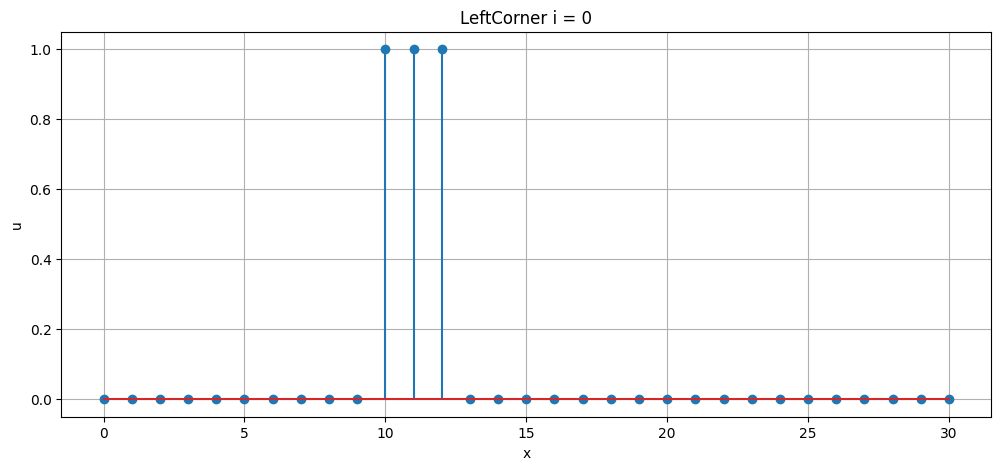

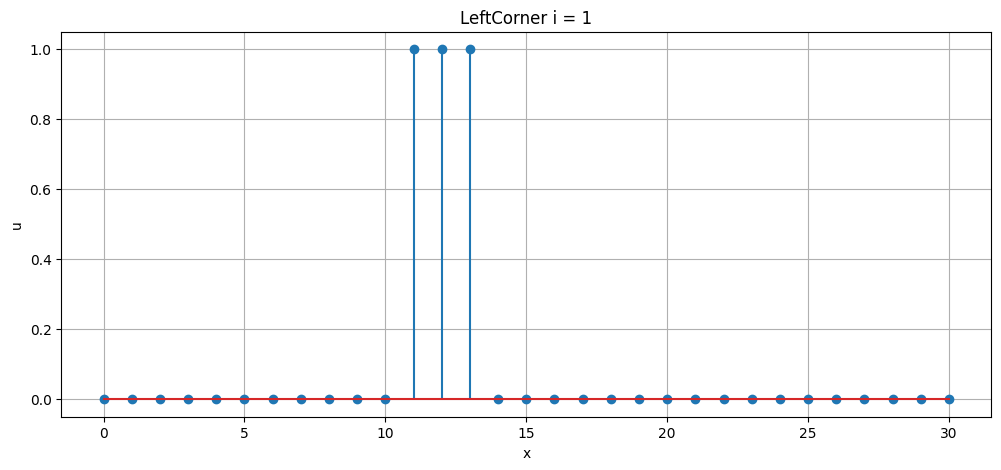

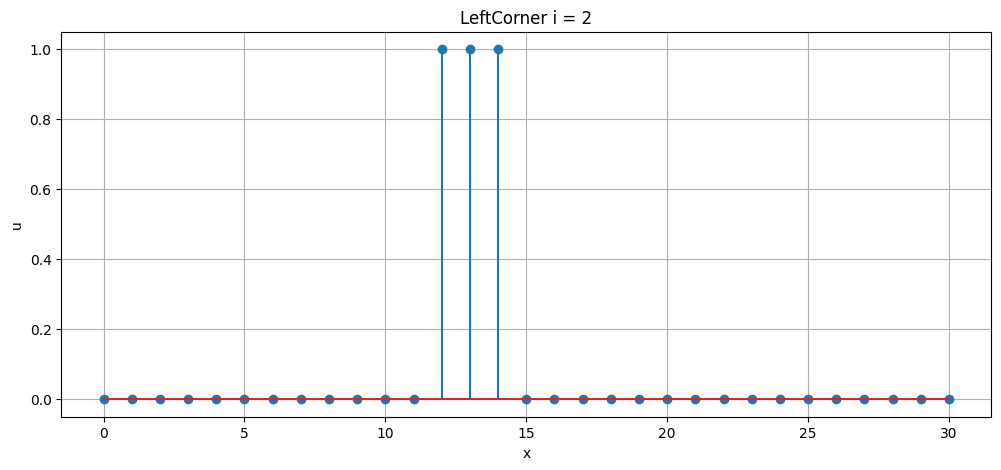

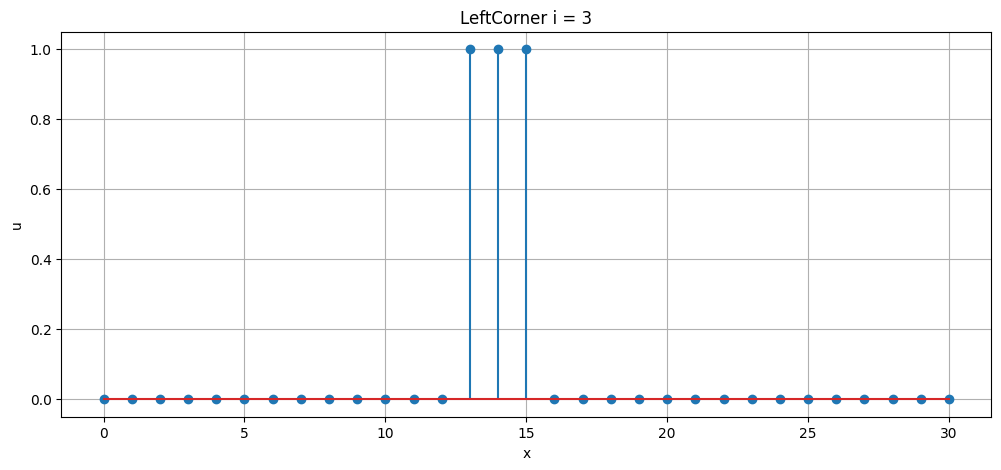

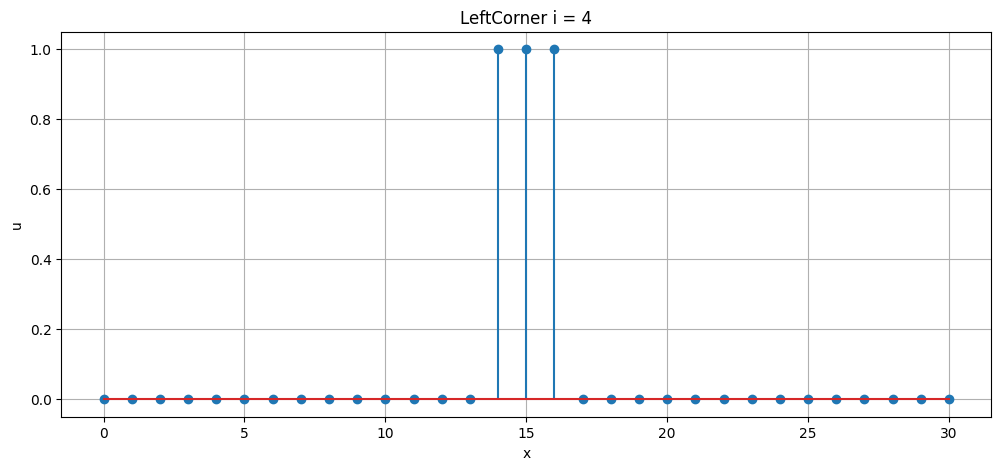

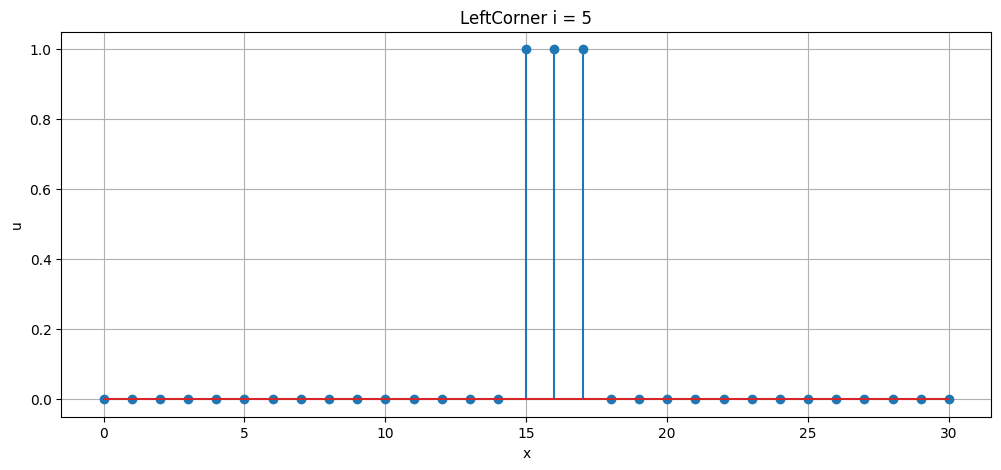

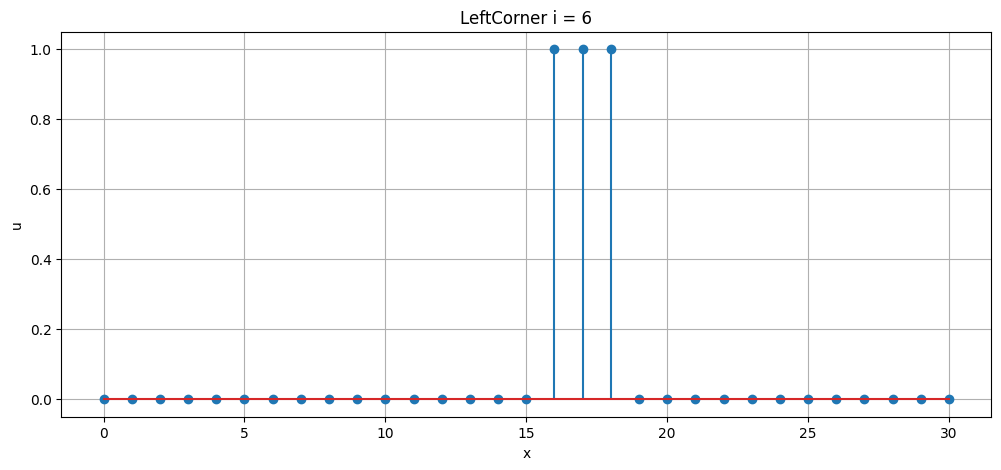

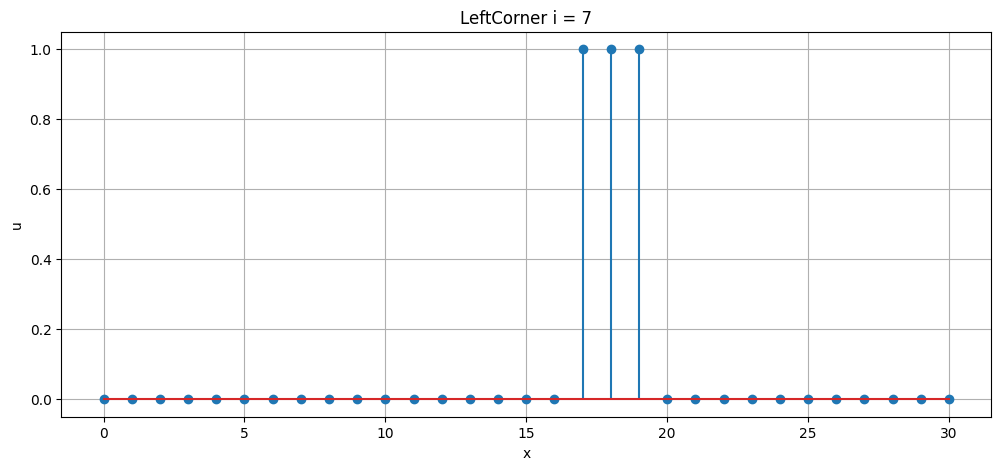

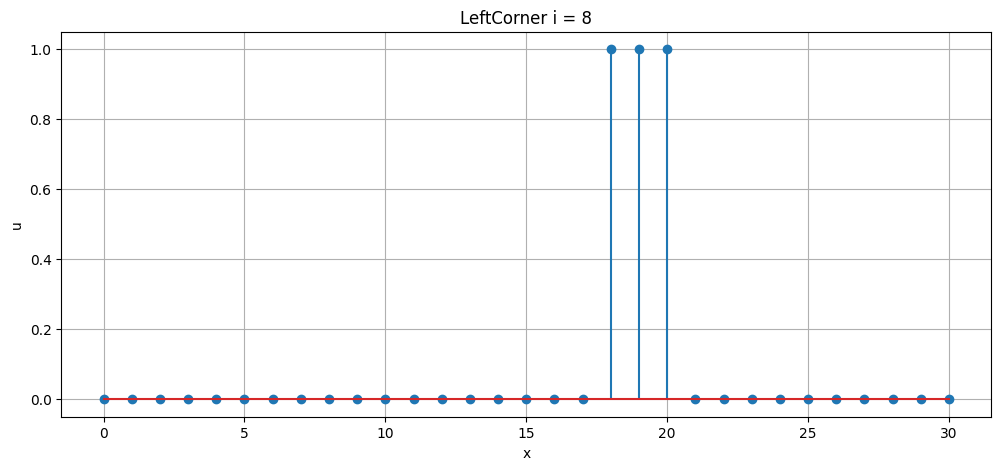

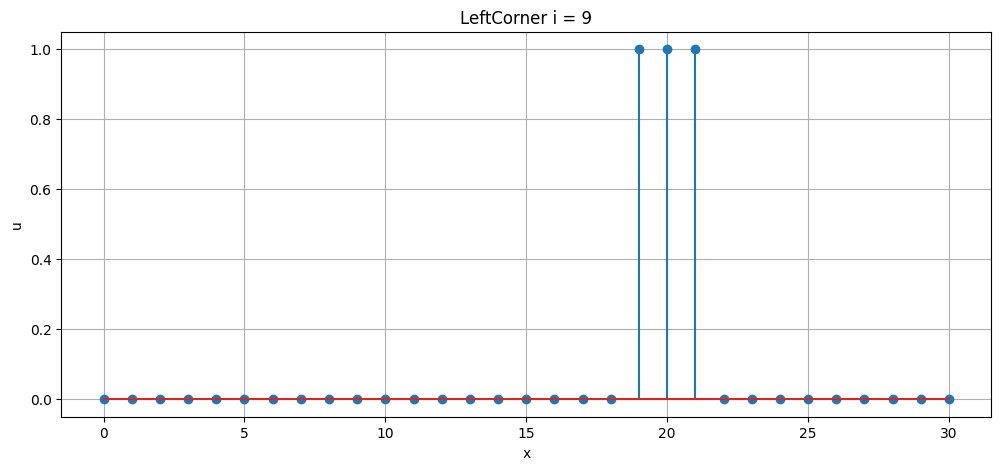

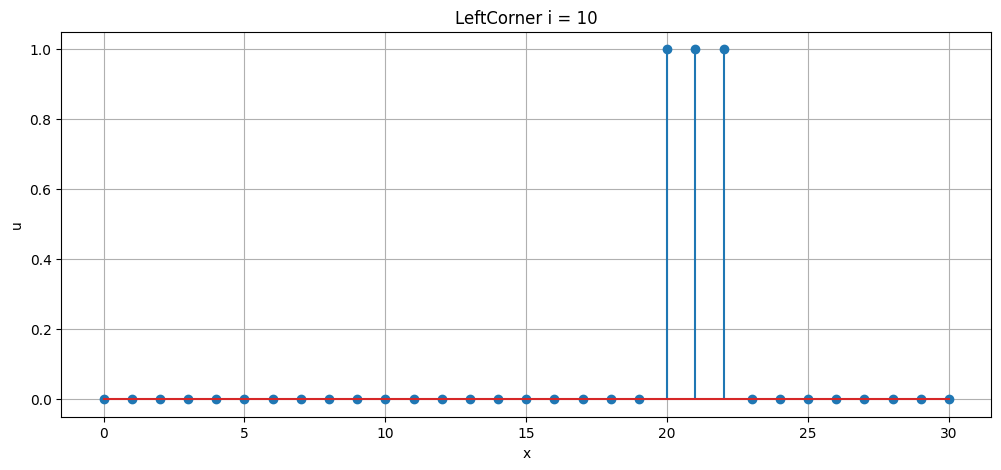

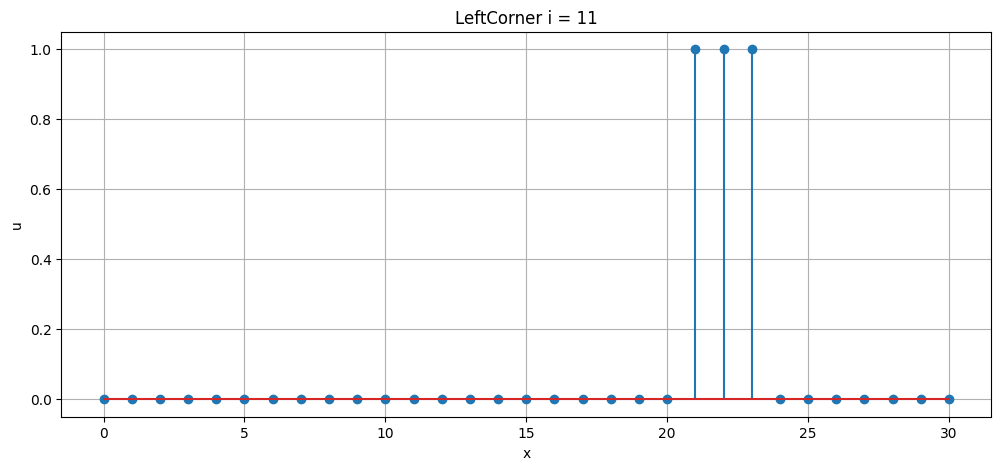

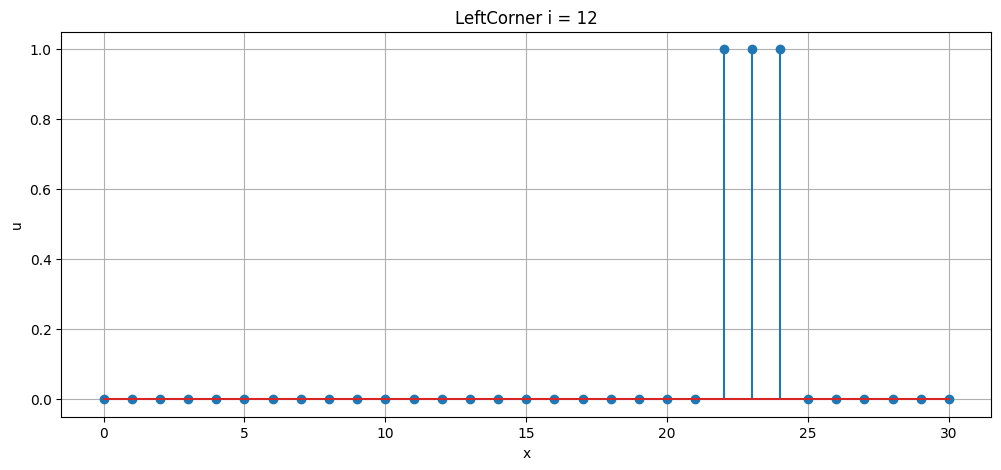

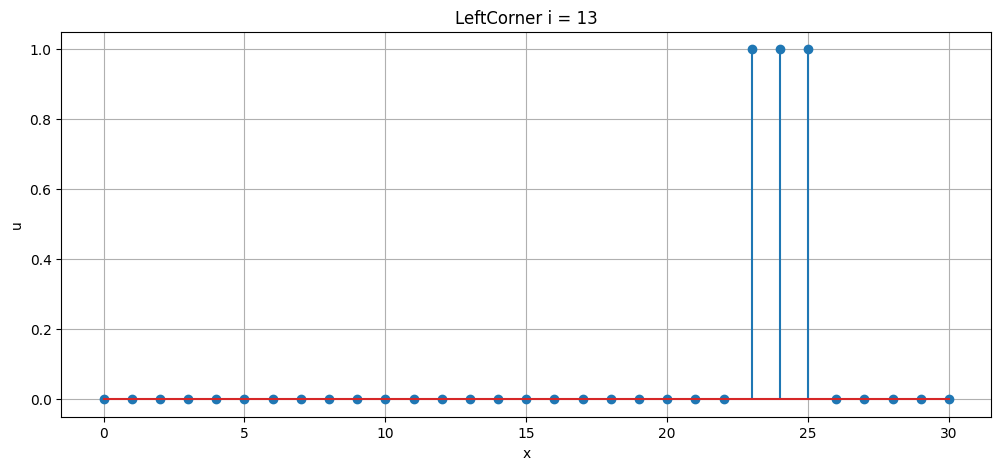

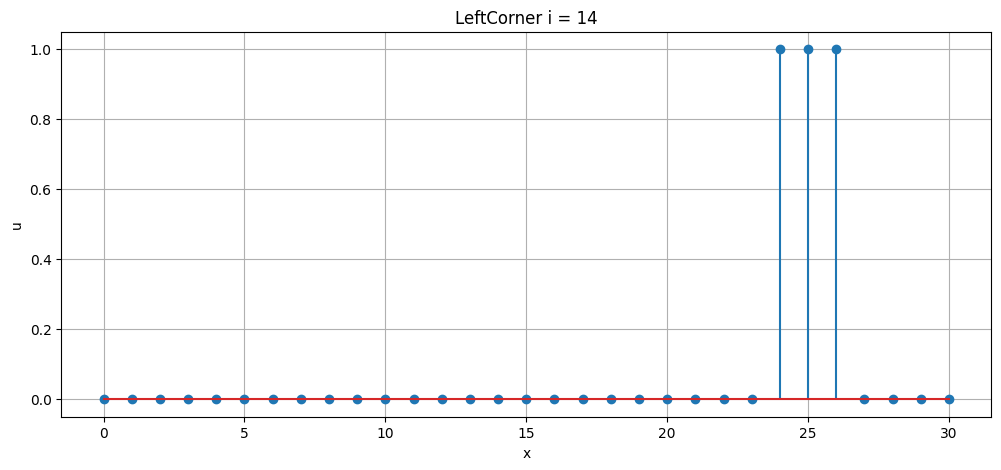

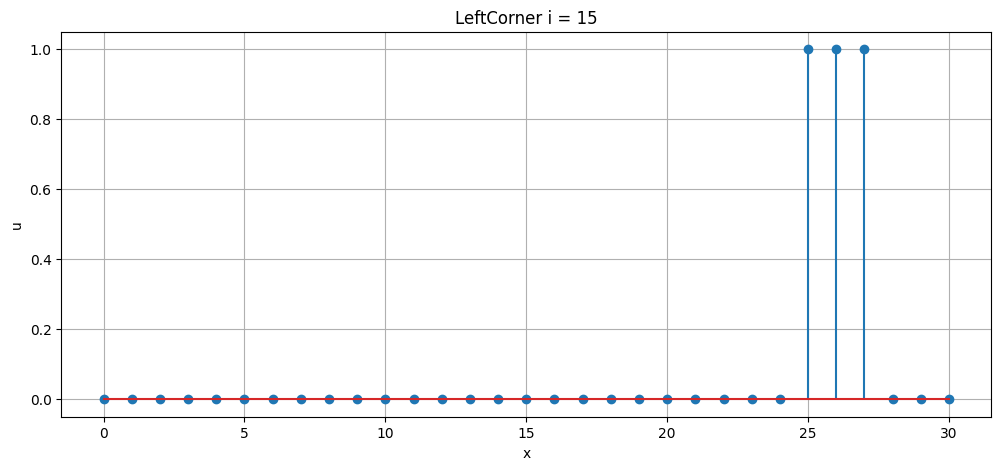

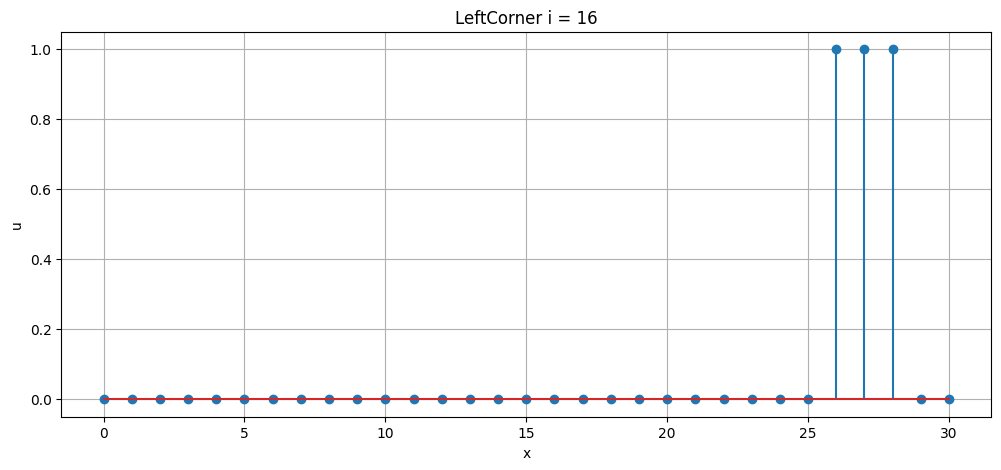

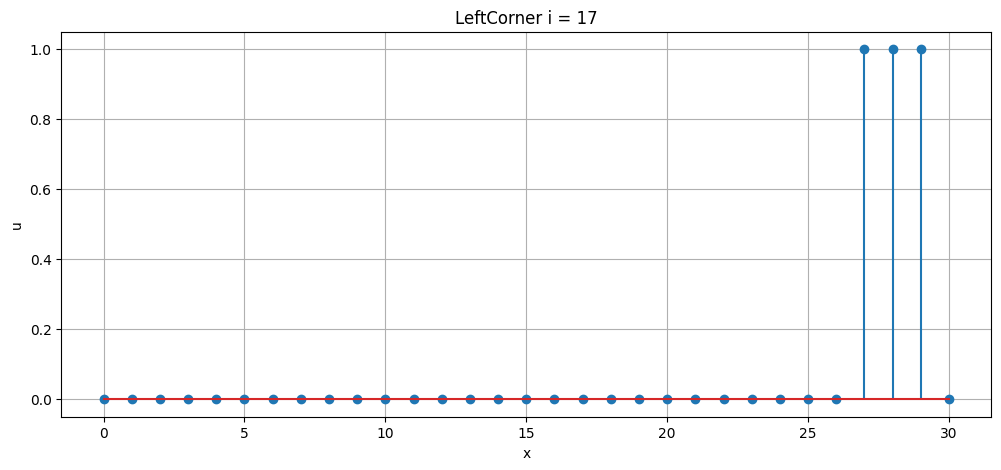

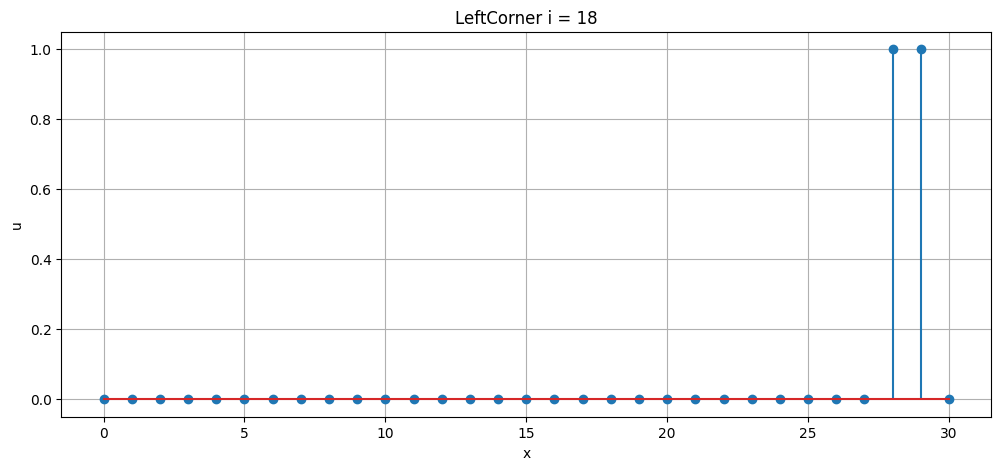

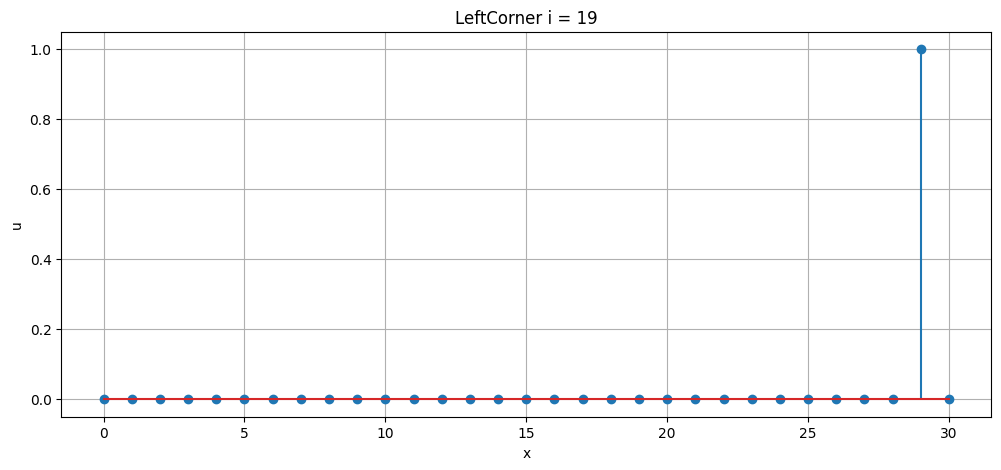

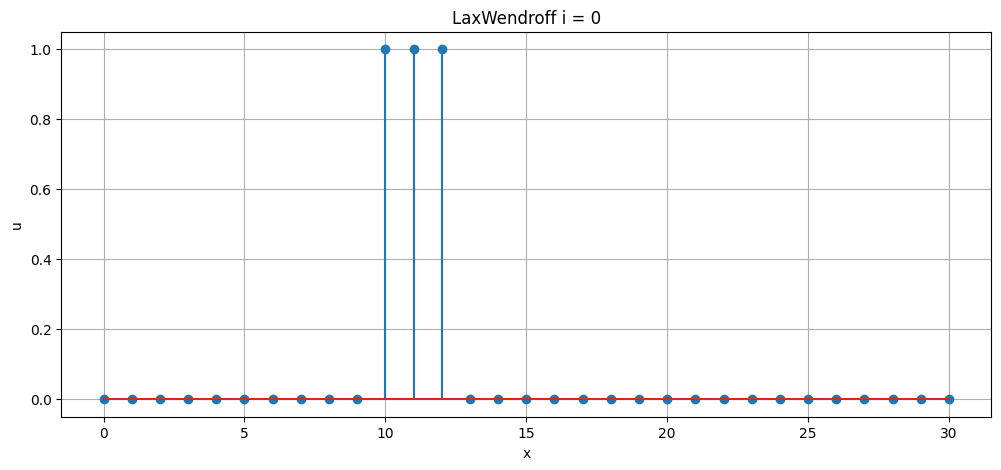

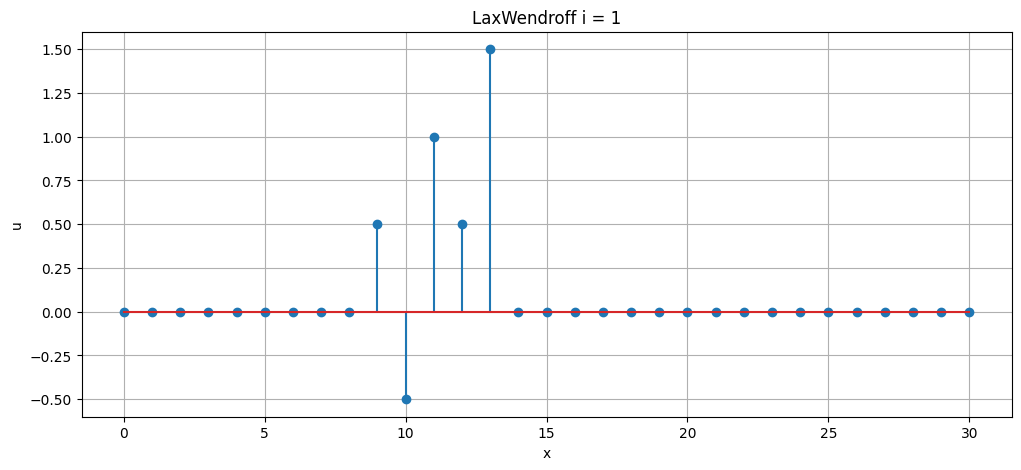

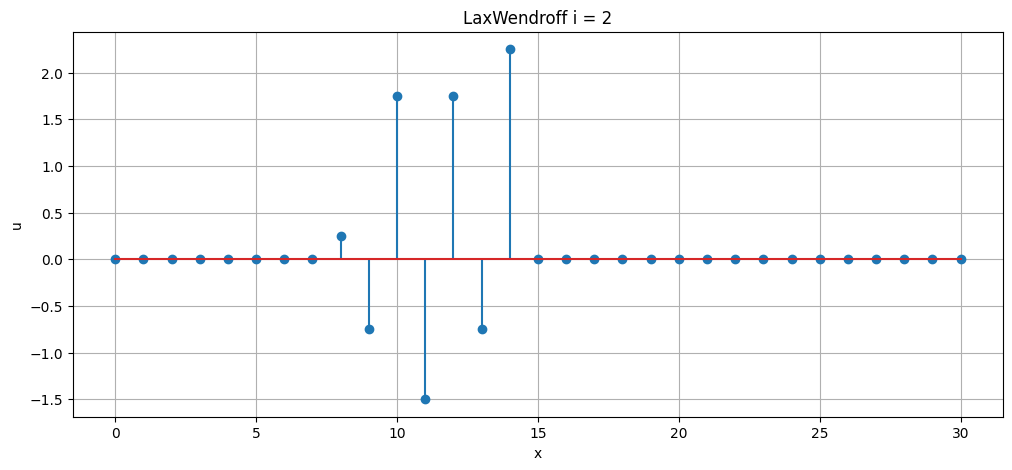

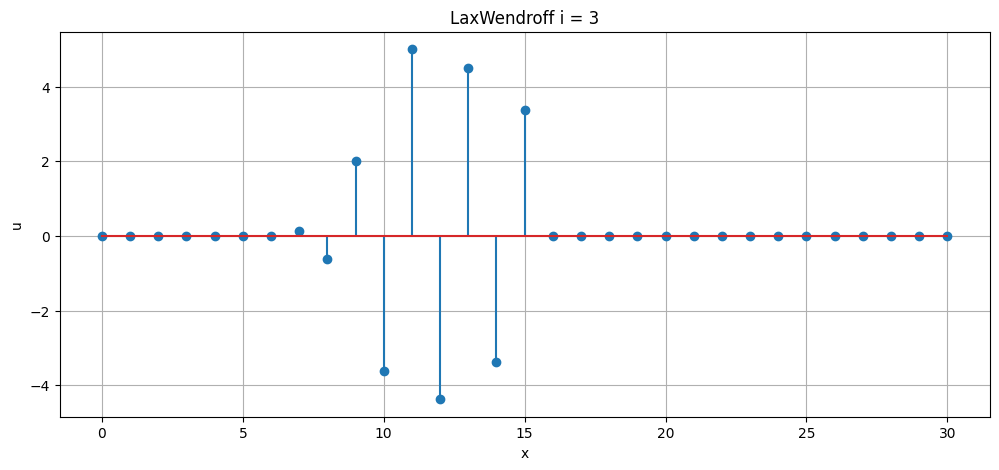

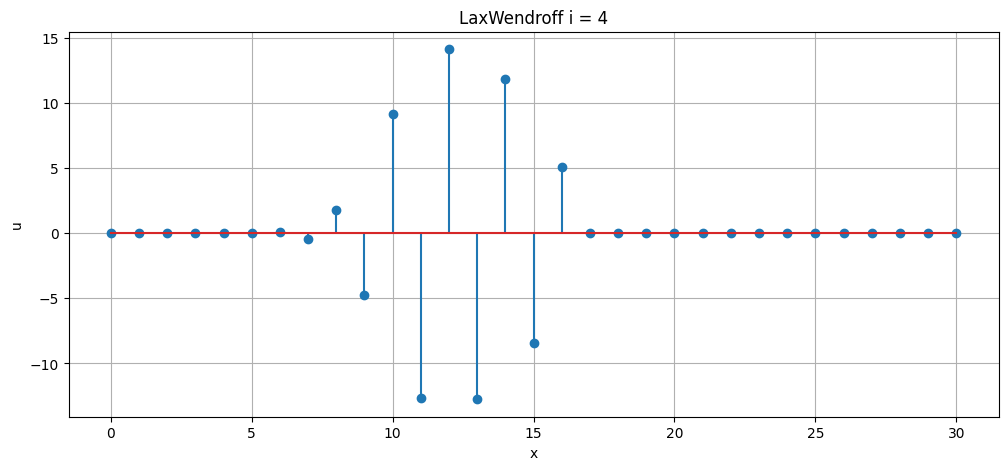

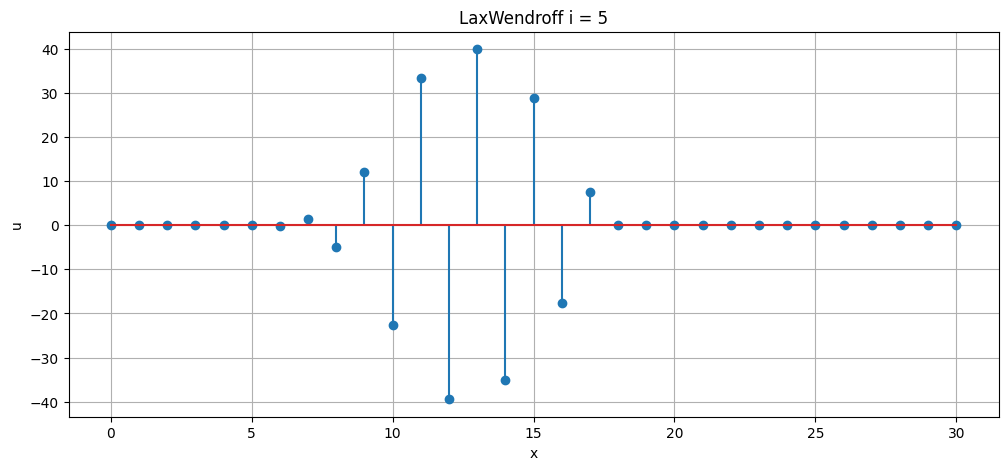

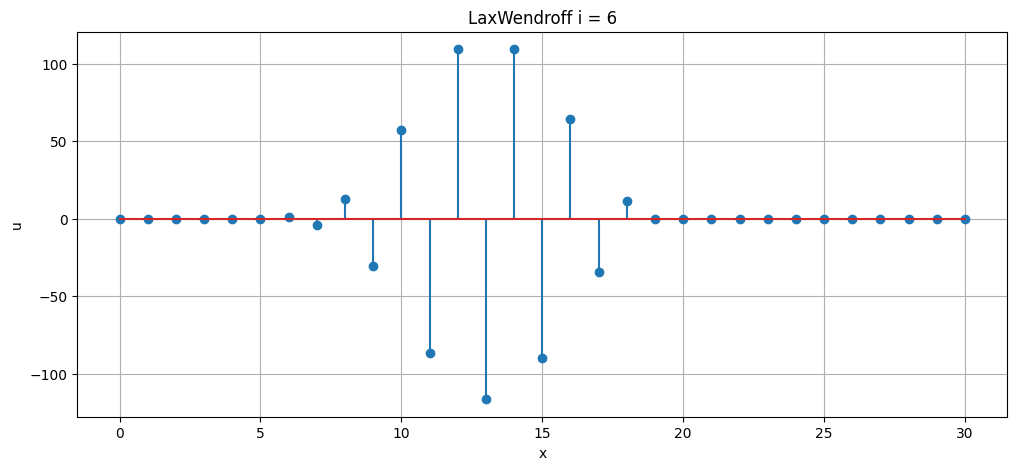

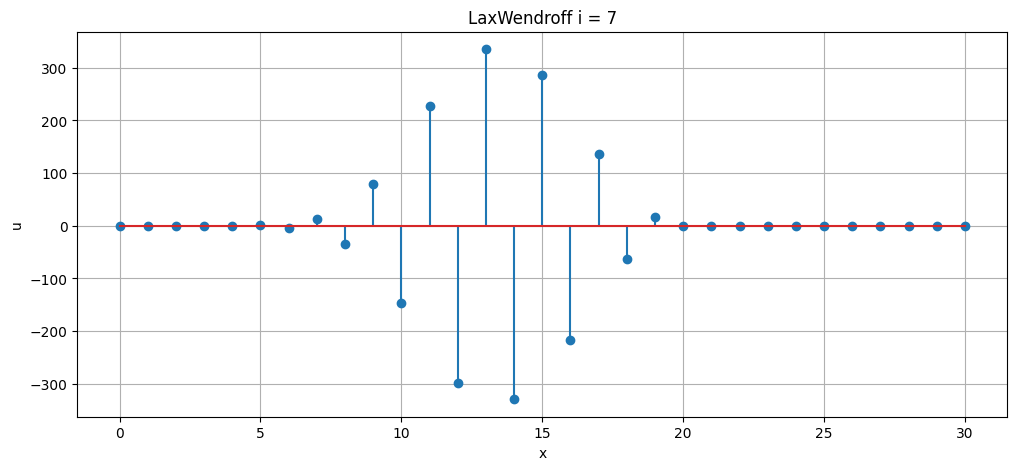

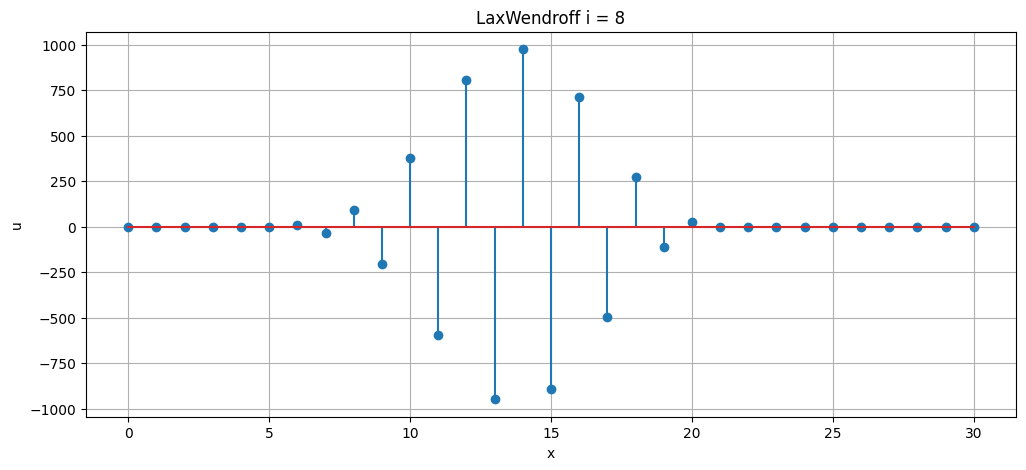

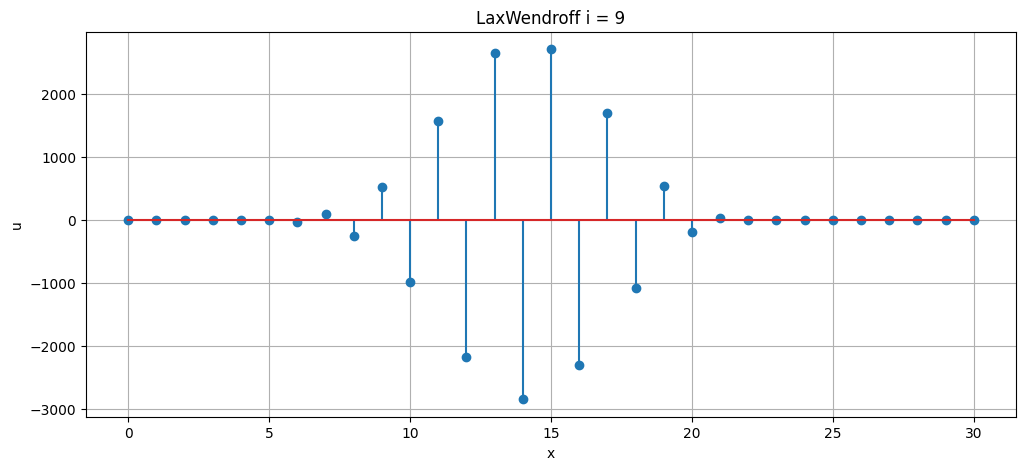

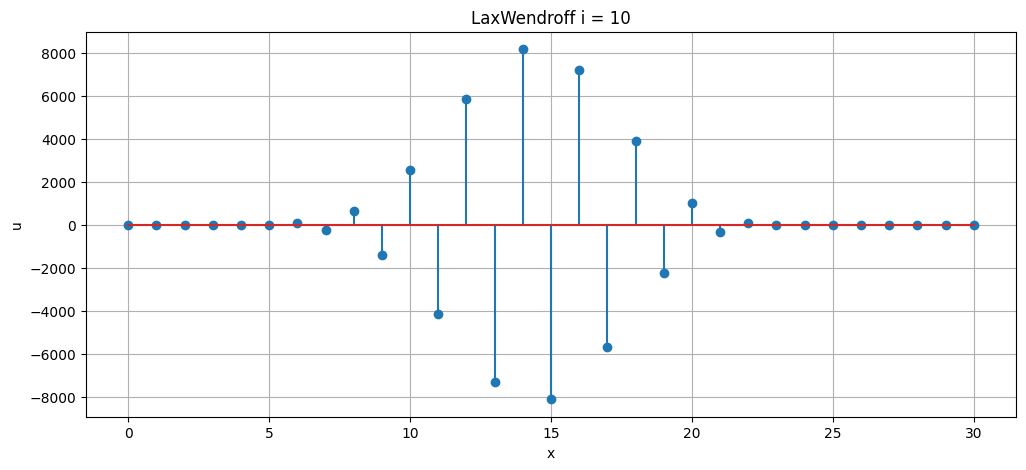

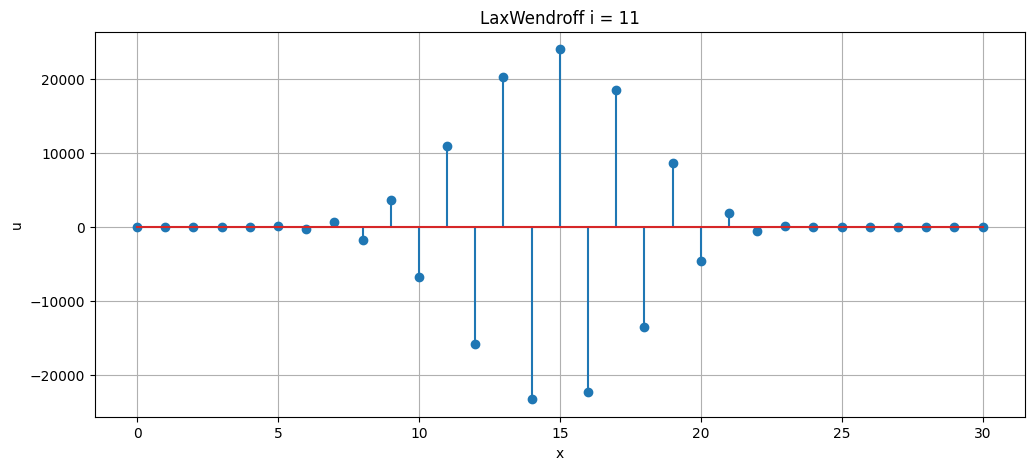

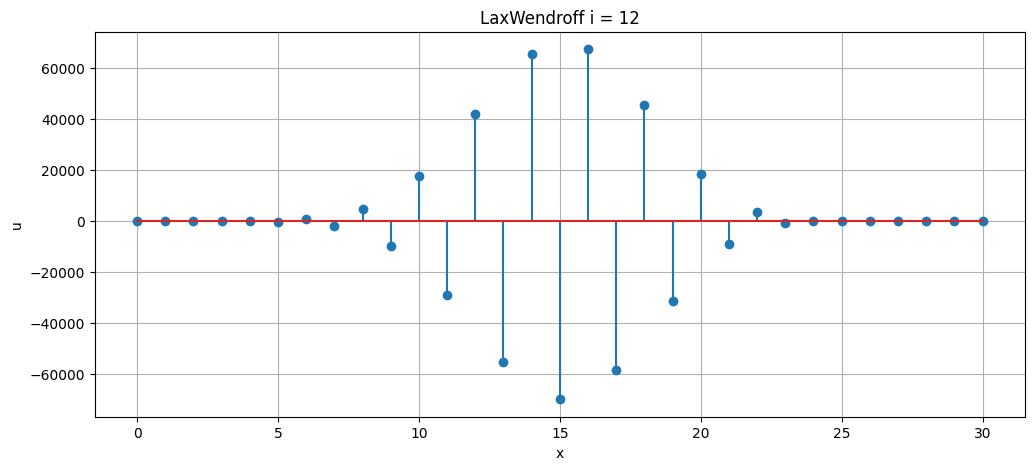

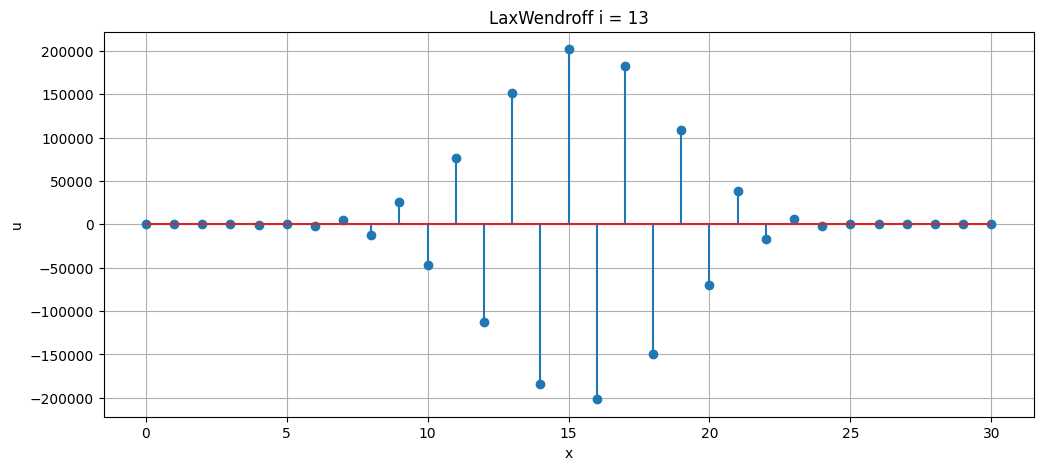

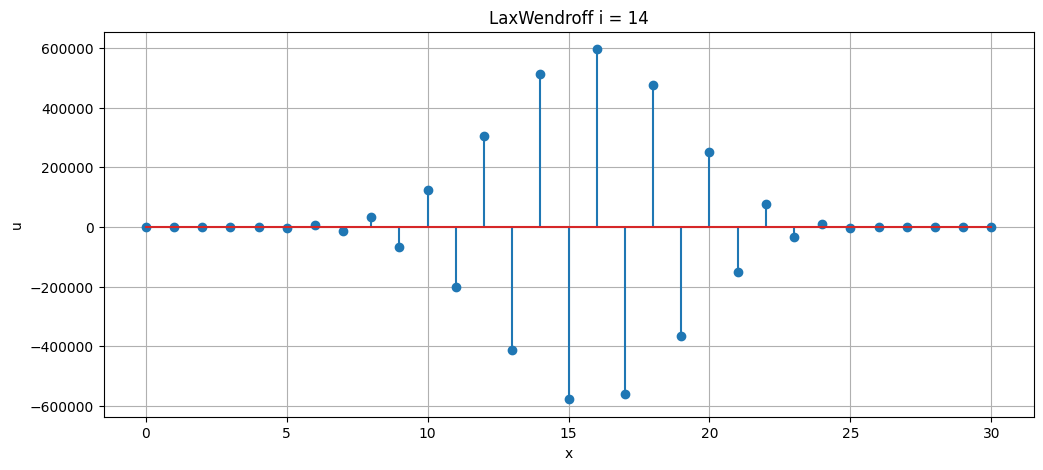

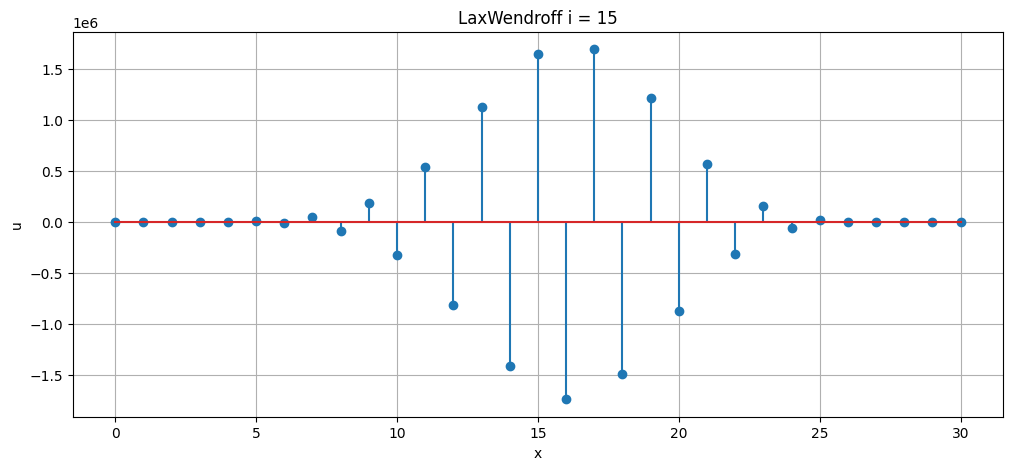

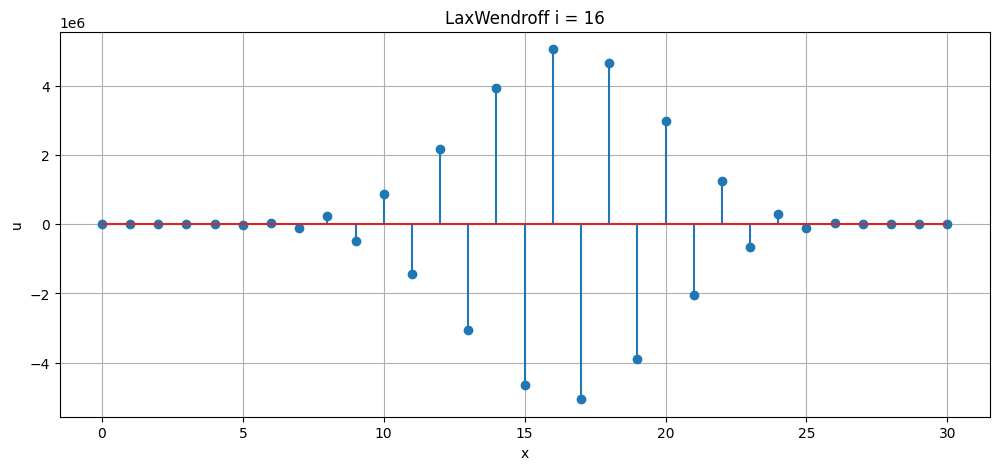

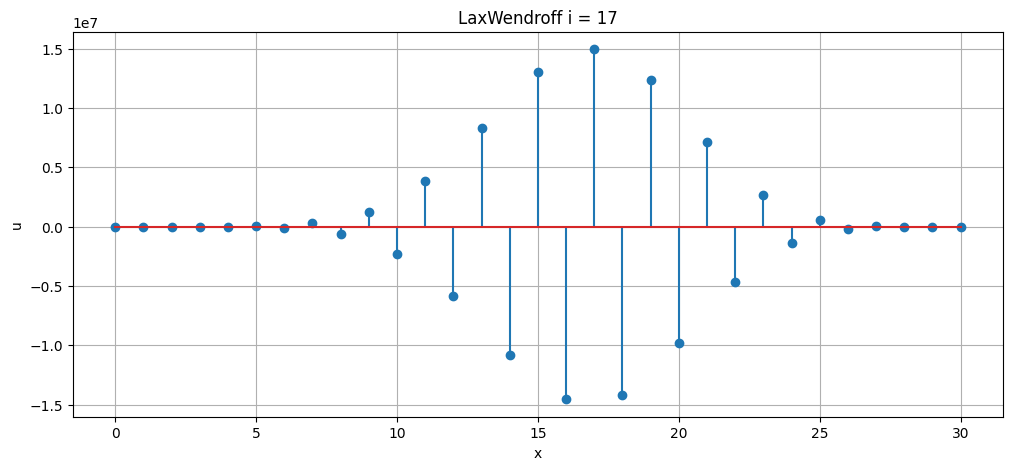

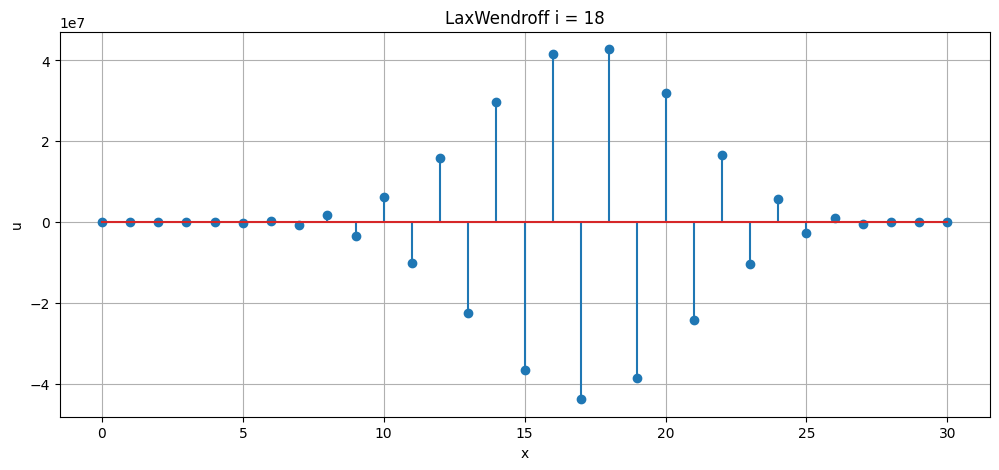

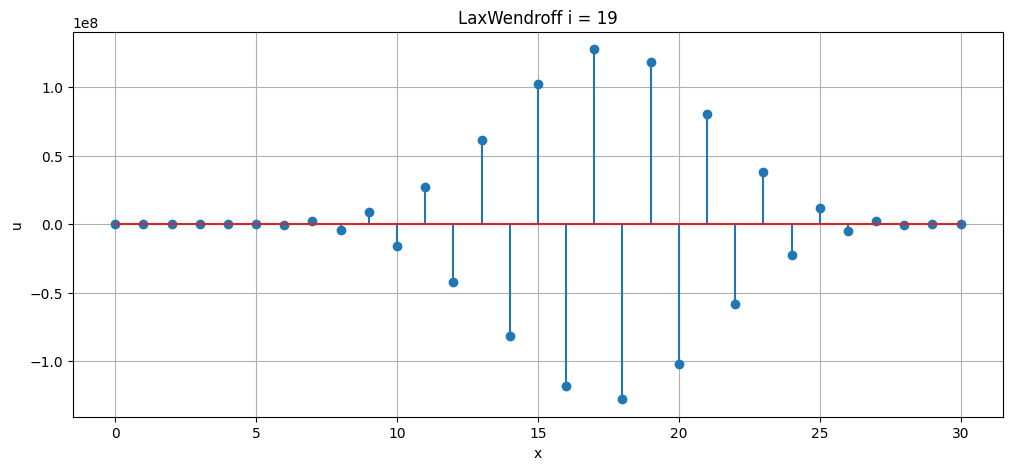

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

h = 1
tau = 1
# В нулевой момент времени u(x)
u0 = np.zeros(31)

# u0[0] = 0
u0[10] = 1
u0[11] = 1
u0[12] = 1

def getNextTimeCutLaxWind(uCurr):
    uList = [0]
    for i in range(1, len(uCurr) - 1):
        uList.append(uCurr[i] - (1 * tau / (2 * h)) * (uCurr[i + 1] - uCurr[i - 1]) + ((tau ** 2)/(h)) * ((uCurr[i + 1] - 2 * uCurr[i] + uCurr[i - 1])/(h**2)))
    uList.append(0)

    return uList

def explicitLaxWendroff(u0, tLast):
    numIt = int(tLast / tau)
    length = len(u0)
    u = [u0]
    for i in range(numIt):
        u.append(getNextTimeCutLaxWind(u[i]))

    return u

# a = 1???
# Тупо сделал как написано, хотя это релаьно что-то не то. Если a = uCurr[i], то волна затухает
def getNextTimeCutLeftCorner(uCurr):
    uList = [0]

    for i in range(1, len(uCurr) - 1):
        uList.append((-(1 * tau / h)) * (uCurr[i] - uCurr[i-1]) + uCurr[i])
    uList.append(0)
    return uList


    
def explicitLeftCorner(u0, tLast):
    numIt = int(tLast / tau)
    length = len(u0)
    u = [u0]
    for i in range(numIt):
        u.append(getNextTimeCutLeftCorner(u[i]))

    return u


# Нет аналитического решения для уравнения переноса
def accurateSolution():
    return []

def main():

    u = explicitLeftCorner(u0, 20)

    for i in range(20):
        x = []
        _u = []
        for j in range(len(u[i])):
            x.append(j)
            _u.append(u[i][j])

        create_plot(x, _u, f'LeftCorner i = {i}')

    u = explicitLaxWendroff(u0, 20)

    for i in range(20):
        x = []
        _u = []
        for j in range(len(u[i])):
            x.append(j)
            _u.append(u[i][j])

        create_plot(x, _u, f'LaxWendroff i = {i}')

    return 0


if(__name__ == '__main__'):
    main()
